<a href="https://colab.research.google.com/github/ginoitaliano/DNA-code/blob/main/a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Chip Analysis:**

In [ ]:
!pip install torchinfo
!pip install thop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import os

# Mount Google Drive
drive.mount('/content/drive')

def save_plot_to_drive(plt, filename):
    """
    Save a matplotlib plot to Google Drive

    Parameters:
    plt: matplotlib.pyplot object
    filename: str, name for the saved file (include .png or .jpg extension)
    """
    # Define the save directory in Google Drive
    save_dir = "/content/drive/My Drive/Colab Plots"

    # Create the directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # Complete file path
    file_path = os.path.join(save_dir, filename)

    # Save the plot
    plt.savefig(file_path)
    print(f"Plot saved to Google Drive at '{file_path}'")

# Example usage:
# Create a sample plot
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.title("Sample Plot")

# Save it to Drive
save_plot_to_drive(plt, "my_plot.png")

# Clear the plot (good practice)
plt.clf()

Mounted at /content/drive
Plot saved to Google Drive at '/content/drive/My Drive/Colab Plots/my_plot.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import time
from torchinfo import summary    #all the footprint memory from the FLOPS
import torchvision.models as models

### **Chip Analysis**

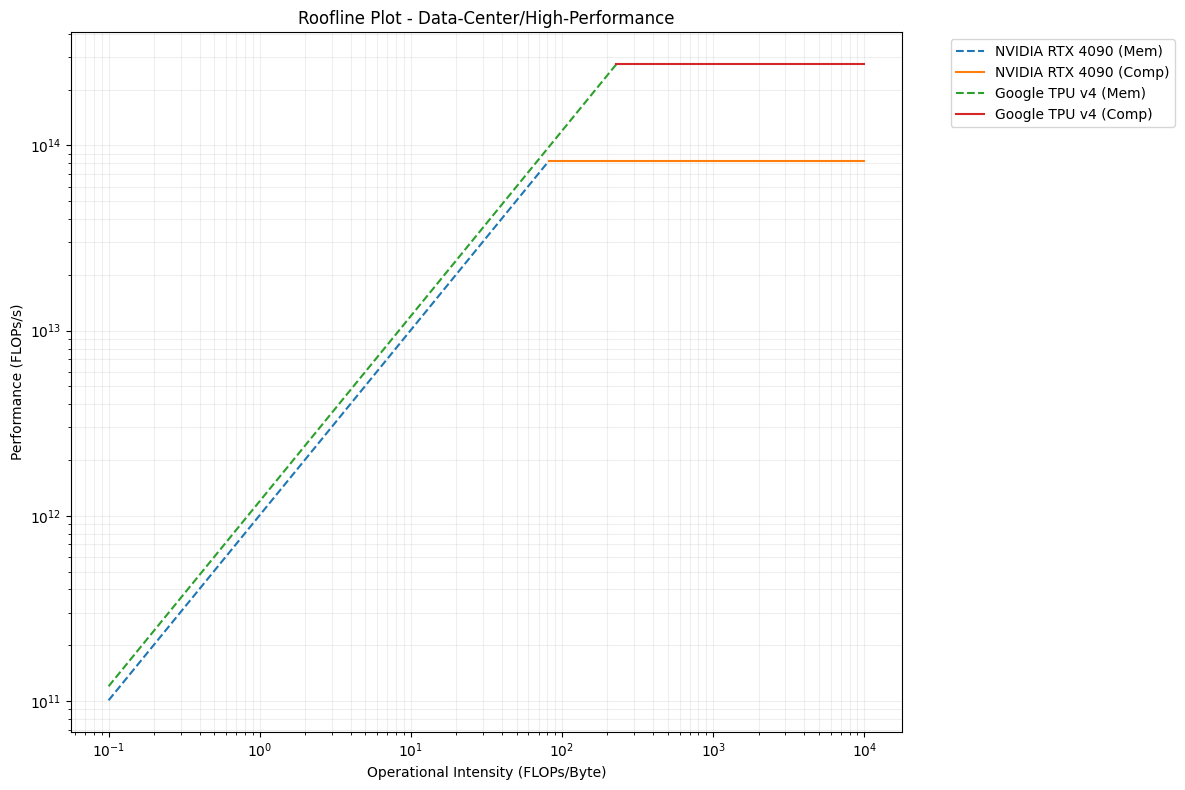

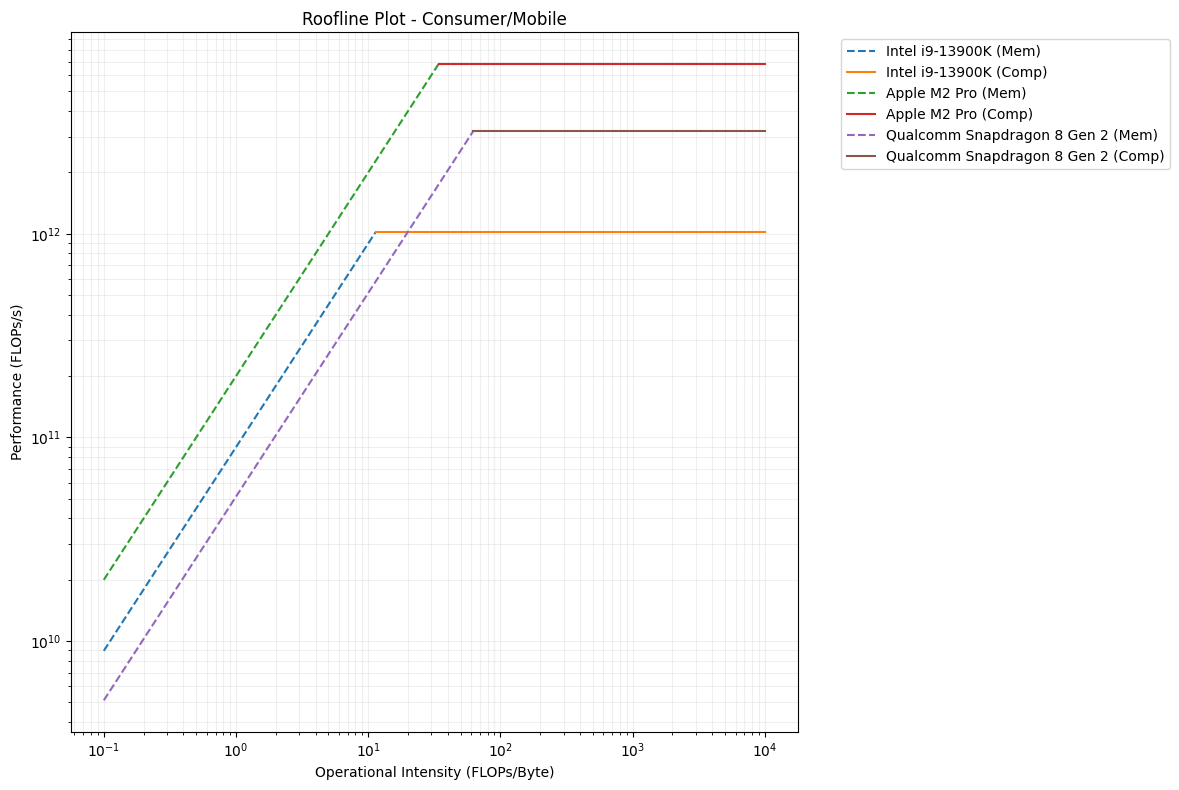


Computations and Sources:
- Intel i9-13900K: 1.018 TFLOPs/s from 24 cores (8P @ 5.8 GHz, 16E @ ~4 GHz), AVX-512; 89.6 GB/s from dual-channel DDR5-5600 (2 * 44.8 GB/s). Source: Intel ARK.
- NVIDIA RTX 4090: 82.6 TFLOPs/s = 16384 CUDA cores * 2 FLOPs/cycle * 2.52 GHz; 1008 GB/s = 384-bit * 21 Gbps GDDR6X / 8. Source: NVIDIA datasheet.
- Google TPU v4: 275 TFLOPs/s (FP32), 1200 GB/s (HBM) from Google specs.
- Apple M2 Pro: 6.8 TFLOPs/s (10-core GPU peak), 200 GB/s (unified memory). Source: Apple.
- Snapdragon 8 Gen 2: 3.2 TFLOPs/s (Adreno GPU, estimated), 51.2 GB/s (LPDDR5X). Source: Qualcomm.

Comparison:
- Google TPU v4 dominates with 275 TFLOPs/s and 1200 GB/s, ideal for data-center AI tasks.
- NVIDIA RTX 4090 offers 82.6 TFLOPs/s and 1008 GB/s, strong for gaming and compute workloads.
- Apple M2 Pro (6.8 TFLOPs/s, 200 GB/s) balances efficiency and performance for consumer devices.
- Intel i9-13900K (1.018 TFLOPs/s, 89.6 GB/s) excels in multi-threaded CPU tasks.
- Snapdragon 8 Gen 2 (

In [ ]:
# Markdown: # Chip Analysis

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Dict, Any

@dataclass
class ChipSpecs:
    platform: str
    peak_flops: float  # Theoretical FLOPs/s
    memory_bandwidth: float  # GB/s
    details: str
    source: str

class ChipAnalyzer:
    def __init__(self, chips_data: Dict[str, Dict[str, Any]]):
        """Initialize with chip specifications."""
        self.chips = {}
        for name, specs in chips_data.items():
            self.chips[name] = ChipSpecs(**specs)

    def plot_roofline(self, chip_groups: Dict[str, list] = None, figsize: tuple = (12, 8)):
        """Generate roofline plot(s) for chips."""
        if chip_groups:
            for group_name, chip_names in chip_groups.items():
                plt.figure(figsize=figsize)
                for name in chip_names:
                    if name not in self.chips:
                        continue
                    specs = self.chips[name]
                    ridge = specs.peak_flops / (specs.memory_bandwidth * 1e9)
                    x_mem = np.logspace(-1, np.log10(ridge), 100)
                    y_mem = specs.memory_bandwidth * 1e9 * x_mem
                    x_comp = np.logspace(np.log10(ridge), 4, 100)
                    y_comp = np.full_like(x_comp, specs.peak_flops)
                    plt.loglog(x_mem, y_mem, '--', label=f'{name} (Mem)')
                    plt.loglog(x_comp, y_comp, '-', label=f'{name} (Comp)')
                plt.grid(True, which="both", ls="-", alpha=0.2)
                plt.xlabel('Operational Intensity (FLOPs/Byte)')
                plt.ylabel('Performance (FLOPs/s)')
                plt.title(f'Roofline Plot - {group_name}')
                plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()
        else:
            plt.figure(figsize=figsize)
            for name, specs in self.chips.items():
                ridge = specs.peak_flops / (specs.memory_bandwidth * 1e9)
                x_mem = np.logspace(-1, np.log10(ridge), 100)
                y_mem = specs.memory_bandwidth * 1e9 * x_mem
                x_comp = np.logspace(np.log10(ridge), 4, 100)
                y_comp = np.full_like(x_comp, specs.peak_flops)
                plt.loglog(x_mem, y_mem, '--', label=f'{name} (Mem)')
                plt.loglog(x_comp, y_comp, '-', label=f'{name} (Comp)')
            plt.grid(True, which="both", ls="-", alpha=0.2)
            plt.xlabel('Operational Intensity (FLOPs/Byte)')
            plt.ylabel('Performance (FLOPs/s)')
            plt.title('Roofline Plot - All Chips')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()

# Chip specifications (5 chips covering CPU, GPU, ASIC, SoC)
chips_data = {
    'Intel i9-13900K': {
        'platform': 'CPU',
        'peak_flops': 1.018e12,  # 1.018 TFLOPs/s
        'memory_bandwidth': 89.6,  # GB/s
        'details': '24 cores (8P+16E), 5.8 GHz boost, AVX-512',
        'source': 'Intel ARK (ark.intel.com)'
    },
    'NVIDIA RTX 4090': {
        'platform': 'GPU',
        'peak_flops': 82.6e12,  # 82.6 TFLOPs/s
        'memory_bandwidth': 1008,  # GB/s
        'details': '16384 CUDA cores, 2.52 GHz boost, GDDR6X',
        'source': 'NVIDIA datasheet (nvidia.com)'
    },
    'Google TPU v4': {
        'platform': 'ASIC',
        'peak_flops': 275e12,  # 275 TFLOPs/s
        'memory_bandwidth': 1200,  # GB/s
        'details': 'AI accelerator, HBM memory',
        'source': 'Google Cloud TPU docs (cloud.google.com/tpu)'
    },
    'Apple M2 Pro': {
        'platform': 'SoC',
        'peak_flops': 6.8e12,  # 6.8 TFLOPs/s
        'memory_bandwidth': 200,  # GB/s
        'details': '12-core CPU, 10-core GPU, unified memory',
        'source': 'Apple specs (apple.com)'
    },
    'Qualcomm Snapdragon 8 Gen 2': {
        'platform': 'SoC',
        'peak_flops': 3.2e12,  # 3.2 TFLOPs/s
        'memory_bandwidth': 51.2,  # GB/s
        'details': '8-core CPU, Adreno GPU, LPDDR5X',
        'source': 'Qualcomm specs (qualcomm.com)'
    }
}

# Group chips (optional dual plots)
chip_groups = {
    'Data-Center/High-Performance': ['NVIDIA RTX 4090', 'Google TPU v4'],
    'Consumer/Mobile': ['Intel i9-13900K', 'Apple M2 Pro', 'Qualcomm Snapdragon 8 Gen 2']
}

def main():
    analyzer = ChipAnalyzer(chips_data)

    # Single roofline plot
    #analyzer.plot_roofline()  # Comment out and uncomment below for dual plots
    analyzer.plot_roofline(chip_groups)

    # Computations and Sources
    print("\nComputations and Sources:")
    print("- Intel i9-13900K: 1.018 TFLOPs/s from 24 cores (8P @ 5.8 GHz, 16E @ ~4 GHz), AVX-512; "
          "89.6 GB/s from dual-channel DDR5-5600 (2 * 44.8 GB/s). Source: Intel ARK.")
    print("- NVIDIA RTX 4090: 82.6 TFLOPs/s = 16384 CUDA cores * 2 FLOPs/cycle * 2.52 GHz; "
          "1008 GB/s = 384-bit * 21 Gbps GDDR6X / 8. Source: NVIDIA datasheet.")
    print("- Google TPU v4: 275 TFLOPs/s (FP32), 1200 GB/s (HBM) from Google specs.")
    print("- Apple M2 Pro: 6.8 TFLOPs/s (10-core GPU peak), 200 GB/s (unified memory). Source: Apple.")
    print("- Snapdragon 8 Gen 2: 3.2 TFLOPs/s (Adreno GPU, estimated), 51.2 GB/s (LPDDR5X). Source: Qualcomm.")

    # Comparison
    print("\nComparison:")
    print("- Google TPU v4 dominates with 275 TFLOPs/s and 1200 GB/s, ideal for data-center AI tasks.")
    print("- NVIDIA RTX 4090 offers 82.6 TFLOPs/s and 1008 GB/s, strong for gaming and compute workloads.")
    print("- Apple M2 Pro (6.8 TFLOPs/s, 200 GB/s) balances efficiency and performance for consumer devices.")
    print("- Intel i9-13900K (1.018 TFLOPs/s, 89.6 GB/s) excels in multi-threaded CPU tasks.")
    print("- Snapdragon 8 Gen 2 (3.2 TFLOPs/s, 51.2 GB/s) is optimized for mobile power efficiency.")

if __name__ == "__main__":
    main()

Chip Analysis:

Intel i9-13900K:
Peak Performance: 1.02 TFLOPS
Memory Bandwidth: 89.6 GB/s
Memory Type: DDR5-5600
Details: Desktop CPU with dual-channel DDR5

NVIDIA RTX 4090:
Peak Performance: 82.60 TFLOPS
Memory Bandwidth: 1008.0 GB/s
Memory Type: GDDR6X
Details: High-end GPU with 384-bit GDDR6X

Google TPU v4:
Peak Performance: 275.00 TFLOPS
Memory Bandwidth: 1200.0 GB/s
Memory Type: HBM
Details: AI ASIC with HBM memory

Apple M2 Pro:
Peak Performance: 6.80 TFLOPS
Memory Bandwidth: 200.0 GB/s
Memory Type: Unified Memory
Details: ARM-based SoC with unified memory

Qualcomm Snapdragon 8 Gen 2:
Peak Performance: 3.20 TFLOPS
Memory Bandwidth: 51.2 GB/s
Memory Type: LPDDR5X
Details: Mobile SoC



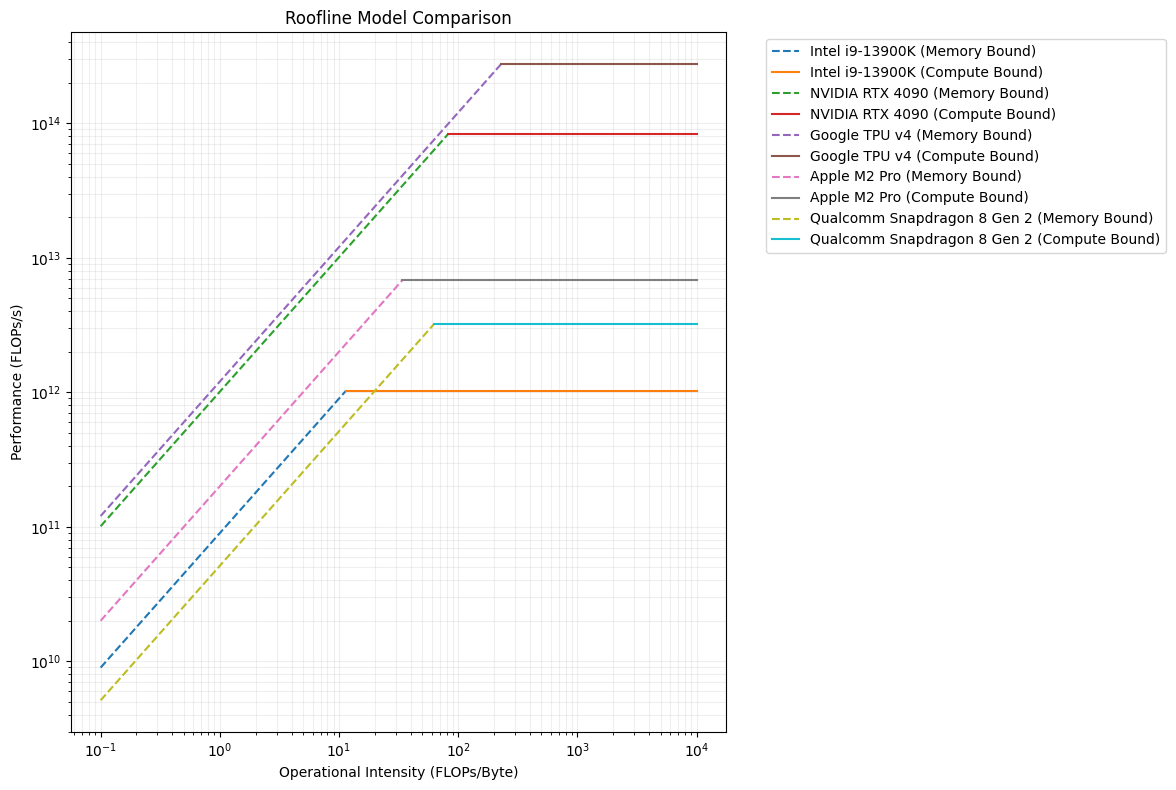

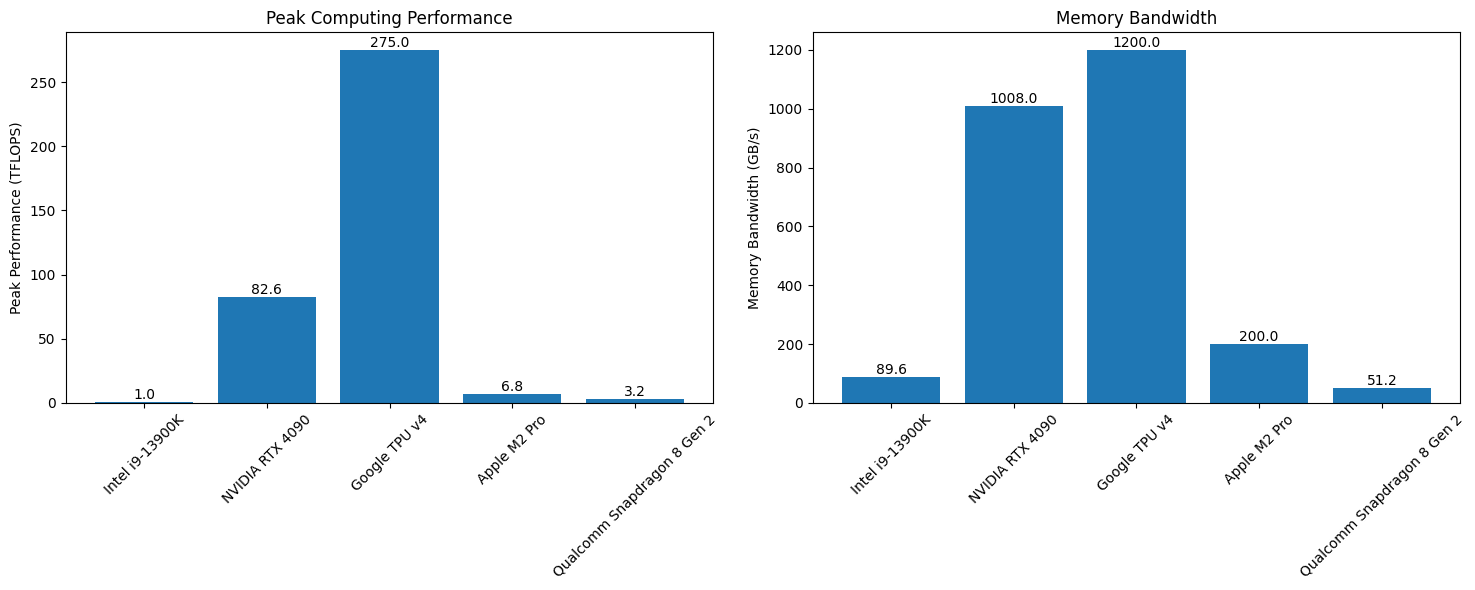

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Dict, Any

@dataclass
class ChipSpecs:
    memory_type: str
    peak_flops: float  # FLOPs/s
    memory_bandwidth: float  # GB/s
    details: str
    channels: int = None
    bus_width: int = None

class ChipAnalyzer:
    def __init__(self, chips_data: Dict[str, Dict[str, Any]]):
        """Initialize ChipAnalyzer with chip specifications."""
        self.chips = {}
        for name, specs in chips_data.items():
            self.chips[name] = ChipSpecs(
                memory_type=specs.get('memory_type', 'Unknown'),
                peak_flops=specs['peak_flops'],
                memory_bandwidth=specs['memory_bandwidth'],
                details=specs['details'],
                channels=specs.get('channels'),
                bus_width=specs.get('bus_width')
            )

    @staticmethod
    def calculate_cpu_bandwidth(frequency_mts: int, channels: int, bus_width_bits: int = 64) -> float:
        """Calculate CPU memory bandwidth in GB/s."""
        bytes_per_transfer = bus_width_bits / 8
        bandwidth_gb_s = (frequency_mts * bytes_per_transfer * channels) / 1000
        return bandwidth_gb_s

    @staticmethod
    def calculate_gpu_bandwidth(bus_width_bits: int, memory_clock_gbps: float) -> float:
        """Calculate GPU memory bandwidth in GB/s."""
        return (bus_width_bits / 8) * memory_clock_gbps

    def print_chip_summary(self) -> None:
        """Print detailed analysis of all chips."""
        print("Chip Analysis:\n")
        for name, specs in self.chips.items():
            print(f"{name}:")
            print(f"Peak Performance: {specs.peak_flops/1e12:.2f} TFLOPS")
            print(f"Memory Bandwidth: {specs.memory_bandwidth:.1f} GB/s")
            print(f"Memory Type: {specs.memory_type}")
            print(f"Details: {specs.details}")
            print()

    def plot_roofline(self, figsize: tuple = (12, 8)) -> None:
        """Generate roofline model plot for all chips."""
        plt.figure(figsize=figsize)

        for name, specs in self.chips.items():
            peak_flops = specs.peak_flops
            memory_bandwidth = specs.memory_bandwidth

            # Calculate ridge point
            ridge_point = peak_flops / (memory_bandwidth * 1e9)

            # Generate points for memory-bound region
            x_mem = np.logspace(-1, np.log10(ridge_point), 100)
            y_mem = memory_bandwidth * 1e9 * x_mem

            # Generate points for compute-bound region
            x_comp = np.logspace(np.log10(ridge_point), 4, 100)
            y_comp = np.full_like(x_comp, peak_flops)

            plt.loglog(x_mem, y_mem, '--', label=f'{name} (Memory Bound)')
            plt.loglog(x_comp, y_comp, '-', label=f'{name} (Compute Bound)')

        plt.grid(True, which="both", ls="-", alpha=0.2)
        plt.xlabel('Operational Intensity (FLOPs/Byte)')
        plt.ylabel('Performance (FLOPs/s)')
        plt.title('Roofline Model Comparison')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    def plot_comparison_metrics(self) -> None:
        """Plot comparison of key metrics across chips."""
        names = list(self.chips.keys())
        flops = [specs.peak_flops/1e12 for specs in self.chips.values()]
        bandwidth = [specs.memory_bandwidth for specs in self.chips.values()]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot FLOPS comparison
        bars1 = ax1.bar(names, flops)
        ax1.set_ylabel('Peak Performance (TFLOPS)')
        ax1.set_title('Peak Computing Performance')
        ax1.tick_params(axis='x', rotation=45)

        # Add value labels
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom')

        # Plot bandwidth comparison
        bars2 = ax2.bar(names, bandwidth)
        ax2.set_ylabel('Memory Bandwidth (GB/s)')
        ax2.set_title('Memory Bandwidth')
        ax2.tick_params(axis='x', rotation=45)

        # Add value labels
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    def measure_actual_flops(self) -> None:
        """
        Placeholder for actual FLOPS measurement implementation.
        This would typically involve running benchmark operations and timing them.
        """

# Chip specifications
chips_data = {
    'Intel i9-13900K': {
        'memory_type': 'DDR5-5600',
        'channels': 2,
        'peak_flops': 1.018e12,  # 1.018 TFLOPS (FP32)
        'memory_bandwidth': 89.6,  # GB/s
        'details': 'Desktop CPU with dual-channel DDR5'
    },
    'NVIDIA RTX 4090': {
        'memory_type': 'GDDR6X',
        'bus_width': 384,
        'peak_flops': 82.6e12,  # 82.6 TFLOPS (FP32)
        'memory_bandwidth': 1008,  # GB/s
        'details': 'High-end GPU with 384-bit GDDR6X'
    },
    'Google TPU v4': {
        'memory_type': 'HBM',
        'peak_flops': 275e12,  # 275 TFLOPS (FP32)
        'memory_bandwidth': 1200,  # GB/s
        'details': 'AI ASIC with HBM memory'
    },
    'Apple M2 Pro': {
        'memory_type': 'Unified Memory',
        'peak_flops': 6.8e12,  # 6.8 TFLOPS (FP32)
        'memory_bandwidth': 200,  # GB/s
        'details': 'ARM-based SoC with unified memory'
    },
    'Qualcomm Snapdragon 8 Gen 2': {
        'memory_type': 'LPDDR5X',
        'peak_flops': 3.2e12,  # 3.2 TFLOPS (FP32)
        'memory_bandwidth': 51.2,  # GB/s
        'details': 'Mobile SoC'
    }
}

def main():
    analyzer = ChipAnalyzer(chips_data)

    # Print detailed summary
    analyzer.print_chip_summary()

    # Plot roofline model
    analyzer.plot_roofline()

    # Plot comparison metrics
    analyzer.plot_comparison_metrics()

    # Measure actual performance (placeholder)
    analyzer.measure_actual_flops()

if __name__ == "__main__":
    main()

# **Section 2: DNN Compute and Memory Analysis**

2.1: 10 DNNs

In [ ]:
# Markdown: # 2.1 Pick 10 DNNs

import torch
from torchvision import models

dnn_list = [
    "resnet18", "resnet50", "vgg16", "densenet121", "mobilenet_v2",
    "inception_v3", "alexnet", "squeezenet1_0", "shufflenet_v2_x1_0", "efficientnet_b0"
]

dnn_models = {}
for name in dnn_list:
    if name == "inception_v3":
        dnn_models[name] = models.inception_v3(pretrained=False).eval()
    else:
        dnn_models[name] = getattr(models, name)(pretrained=False).eval()

print("Selected 10 DNNs:", list(dnn_models.keys()))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Selected 10 DNNs: ['resnet18', 'resnet50', 'vgg16', 'densenet121', 'mobilenet_v2', 'inception_v3', 'alexnet', 'squeezenet1_0', 'shufflenet_v2_x1_0', 'efficientnet_b0']


2.2: FLOPs, Memory Footprint, and Operational Intensity

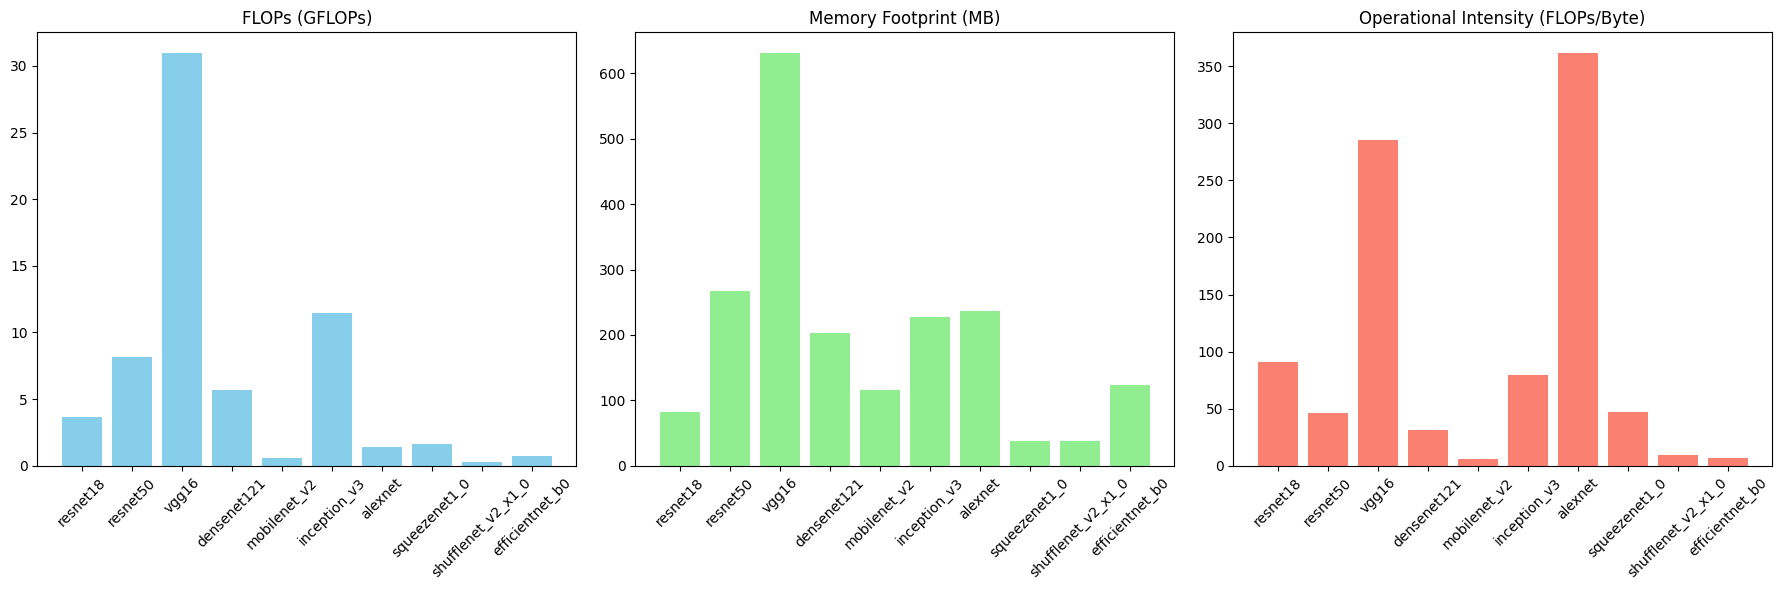

In [ ]:
# Markdown: # 2.2 FLOPs, Memory Footprint, and Operational Intensity

!pip install torchinfo
import matplotlib.pyplot as plt
from torchinfo import summary

# Define input size and calculate metrics
batch_size = 1  # Single batch for simplicity
dnn_metrics = {}
for name, model in dnn_models.items():
    input_size = (batch_size, 3, 299, 299) if name == "inception_v3" else (batch_size, 3, 224, 224)
    stats = summary(model, input_size=input_size, verbose=0)
    flops = stats.total_mult_adds * 2  # Convert MACs to FLOPs
    memory = stats.total_output_bytes / (1024**2)  # MB (activations)
    param_memory = stats.total_param_bytes / (1024**2)  # MB (parameters)
    total_memory = memory + param_memory
    intensity = flops / stats.total_output_bytes  # FLOPs/byte
    dnn_metrics[name] = {"flops": flops, "memory": total_memory, "intensity": intensity}

# Bar charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
names = list(dnn_metrics.keys())
ax1.bar(names, [m["flops"] / 1e9 for m in dnn_metrics.values()], color='skyblue')
ax1.set_title("FLOPs (GFLOPs)")
ax1.tick_params(axis='x', rotation=45)
ax2.bar(names, [m["memory"] for m in dnn_metrics.values()], color='lightgreen')
ax2.set_title("Memory Footprint (MB)")
ax2.tick_params(axis='x', rotation=45)
ax3.bar(names, [m["intensity"] for m in dnn_metrics.values()], color='salmon')
ax3.set_title("Operational Intensity (FLOPs/Byte)")
ax3.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Markdown: # Summarize DNN Models with torchinfo

!pip install torchinfo  # Install if not already installed
from torchinfo import summary

# Define input sizes (batch size = 1 for consistency with Section 2.2)
batch_size = 1
dnn_summaries = {}

for name, model in dnn_models.items():
    input_size = (batch_size, 3, 299, 299) if name == "inception_v3" else (batch_size, 3, 224, 224)
    summary_data = summary(model, input_size=input_size, verbose=0, device='cuda' if torch.cuda.is_available() else 'cpu')
    dnn_summaries[name] = summary_data

    # Print or store summary details
    print(f"\nSummary for {name}:")
    print(f"Total Parameters: {summary_data.total_params:,}")
    print(f"Total MACs (Multiply-Accumulates): {summary_data.total_mult_adds:,}")
    print(f"Total FLOPs (MACs * 2): {summary_data.total_mult_adds * 2 / 1e9:.2f} GFLOPs")
    print(f"Total Memory (Params + Activations): {(summary_data.total_param_bytes + summary_data.total_output_bytes) / (1024**2):.2f} MB")

# Optional: Store for further analysis (e.g., in dnn_metrics)
for name, summary_data in dnn_summaries.items():
    flops = summary_data.total_mult_adds * 2  # Convert MACs to FLOPs
    memory = (summary_data.total_param_bytes + summary_data.total_output_bytes) / (1024**2)  # MB
    intensity = flops / (summary_data.total_output_bytes + summary_data.total_param_bytes)  # FLOPs/byte
    if name not in dnn_metrics:  # Assuming dnn_metrics from Cell 2.2
        dnn_metrics[name] = {"flops": flops, "memory": memory, "intensity": intensity}
    else:
        dnn_metrics[name].update({"flops": flops, "memory": memory, "intensity": intensity})


Summary for resnet18:
Total Parameters: 11,689,512
Total MACs (Multiply-Accumulates): 1,814,083,944
Total FLOPs (MACs * 2): 3.63 GFLOPs
Total Memory (Params + Activations): 82.50 MB

Summary for resnet50:
Total Parameters: 25,557,032
Total MACs (Multiply-Accumulates): 4,089,238,376
Total FLOPs (MACs * 2): 8.18 GFLOPs
Total Memory (Params + Activations): 267.09 MB

Summary for vgg16:
Total Parameters: 138,357,544
Total MACs (Multiply-Accumulates): 15,483,821,032
Total FLOPs (MACs * 2): 30.97 GFLOPs
Total Memory (Params + Activations): 631.22 MB

Summary for densenet121:
Total Parameters: 7,978,856
Total MACs (Multiply-Accumulates): 2,834,246,312
Total FLOPs (MACs * 2): 5.67 GFLOPs
Total Memory (Params + Activations): 202.61 MB

Summary for mobilenet_v2:
Total Parameters: 3,504,872
Total MACs (Multiply-Accumulates): 300,809,384
Total FLOPs (MACs * 2): 0.60 GFLOPs
Total Memory (Params + Activations): 115.28 MB

Summary for inception_v3:
Total Parameters: 27,161,264
Total MACs (Multiply-A

2.3: Overlay Operational Intensity on Roofline Plots

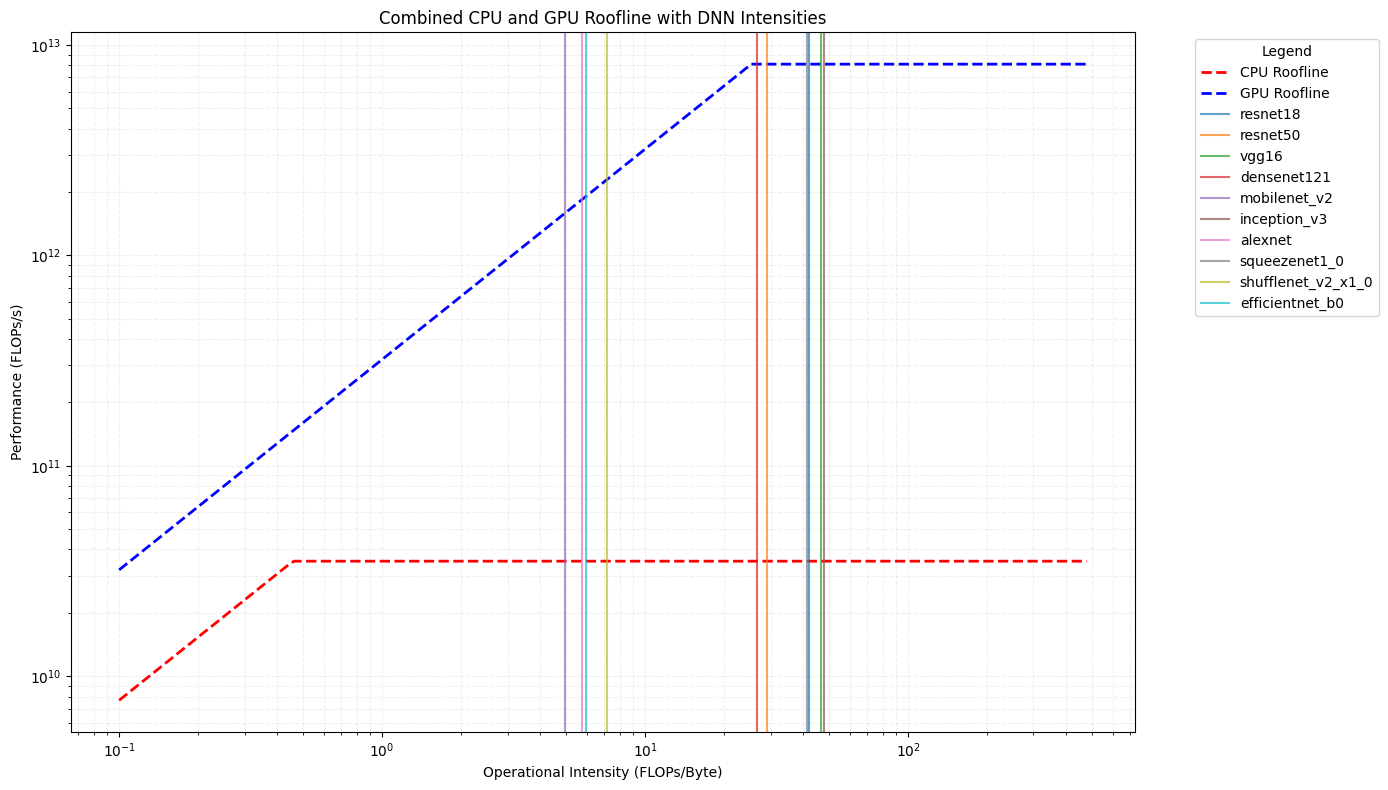

In [ ]:
# Markdown: # 2.3 Roofline Plots with Operational Intensity (CPU and GPU Overlay)

import numpy as np
import matplotlib.pyplot as plt

# Colab hardware specs (updated from analysis)
specs = {
    "CPU": {"peak_flops": 35.2e9, "bandwidth": 76.8e9},  # Xeon (R) @ 2.20GHz: 35.2 GFLOPs/s, 76.8 GB/s
    "GPU": {"peak_flops": 8.1e12, "bandwidth": 320e9}  # Tesla T4: 8.1 TFLOPs/s, 320 GB/s
}

# Roofline plot with both CPU and GPU overlaid
plt.figure(figsize=(14, 8))

# Plot rooflines for CPU and GPU
colors = {'CPU': 'red', 'GPU': 'blue'}
for dev, spec in specs.items():
    ridge = spec["peak_flops"] / spec["bandwidth"]
    # Extend x-axis to cover all DNN intensities and beyond
    max_intensity = max(m["intensity"] for m in dnn_metrics.values()) * 10  # Extend 10x beyond max intensity
    x = np.logspace(-1, np.log10(max_intensity), 200)  # More points for smoother curve
    y = np.minimum(spec["bandwidth"] * x, spec["peak_flops"])
    plt.loglog(x, y, '--', label=f'{dev} Roofline', color=colors[dev], linewidth=2)

# Overlay operational intensities with unique colors
cmap = plt.get_cmap("tab10")  # Use tab10 colormap for distinct colors
for i, (name, m) in enumerate(dnn_metrics.items()):  # Changed .values() to .items()
    plt.axvline(m["intensity"], linestyle='-', color=cmap(i % 10), alpha=0.7, label=name, linewidth=1.5)

# Customize plot
plt.xlabel("Operational Intensity (FLOPs/Byte)")
plt.ylabel("Performance (FLOPs/s)")
plt.title("Combined CPU and GPU Roofline with DNN Intensities")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title="Legend")  # Add title to legend
plt.grid(True, which="both", ls="--", alpha=0.2)
plt.tight_layout()
plt.show()

Memory/Compute Bound Workloads

In [ ]:
# Markdown: # 2.4 Memory/Compute Bound Analysis

for dev, spec in specs.items():
    ridge = spec["peak_flops"] / spec["bandwidth"]
    print(f"\n{dev} (Ridge: {ridge:.2f} FLOPs/Byte):")
    for name, m in dnn_metrics.items():
        bound = "Memory-bound" if m["intensity"] < ridge else "Compute-bound"
        print(f"  {name}: {bound} (Intensity: {m['intensity']:.2f} FLOPs/Byte)")


CPU (Ridge: 0.46 FLOPs/Byte):
  resnet18: Compute-bound (Intensity: 41.94 FLOPs/Byte)
  resnet50: Compute-bound (Intensity: 29.20 FLOPs/Byte)
  vgg16: Compute-bound (Intensity: 46.79 FLOPs/Byte)
  densenet121: Compute-bound (Intensity: 26.68 FLOPs/Byte)
  mobilenet_v2: Compute-bound (Intensity: 4.98 FLOPs/Byte)
  inception_v3: Compute-bound (Intensity: 47.84 FLOPs/Byte)
  alexnet: Compute-bound (Intensity: 5.76 FLOPs/Byte)
  squeezenet1_0: Compute-bound (Intensity: 41.41 FLOPs/Byte)
  shufflenet_v2_x1_0: Compute-bound (Intensity: 7.19 FLOPs/Byte)
  efficientnet_b0: Compute-bound (Intensity: 5.98 FLOPs/Byte)

GPU (Ridge: 25.31 FLOPs/Byte):
  resnet18: Compute-bound (Intensity: 41.94 FLOPs/Byte)
  resnet50: Compute-bound (Intensity: 29.20 FLOPs/Byte)
  vgg16: Compute-bound (Intensity: 46.79 FLOPs/Byte)
  densenet121: Compute-bound (Intensity: 26.68 FLOPs/Byte)
  mobilenet_v2: Memory-bound (Intensity: 4.98 FLOPs/Byte)
  inception_v3: Compute-bound (Intensity: 47.84 FLOPs/Byte)
  alexnet:

### **Section 3: DNN Performance Benchmarking**

## 3.1:Inference Latency vs. FLOPs

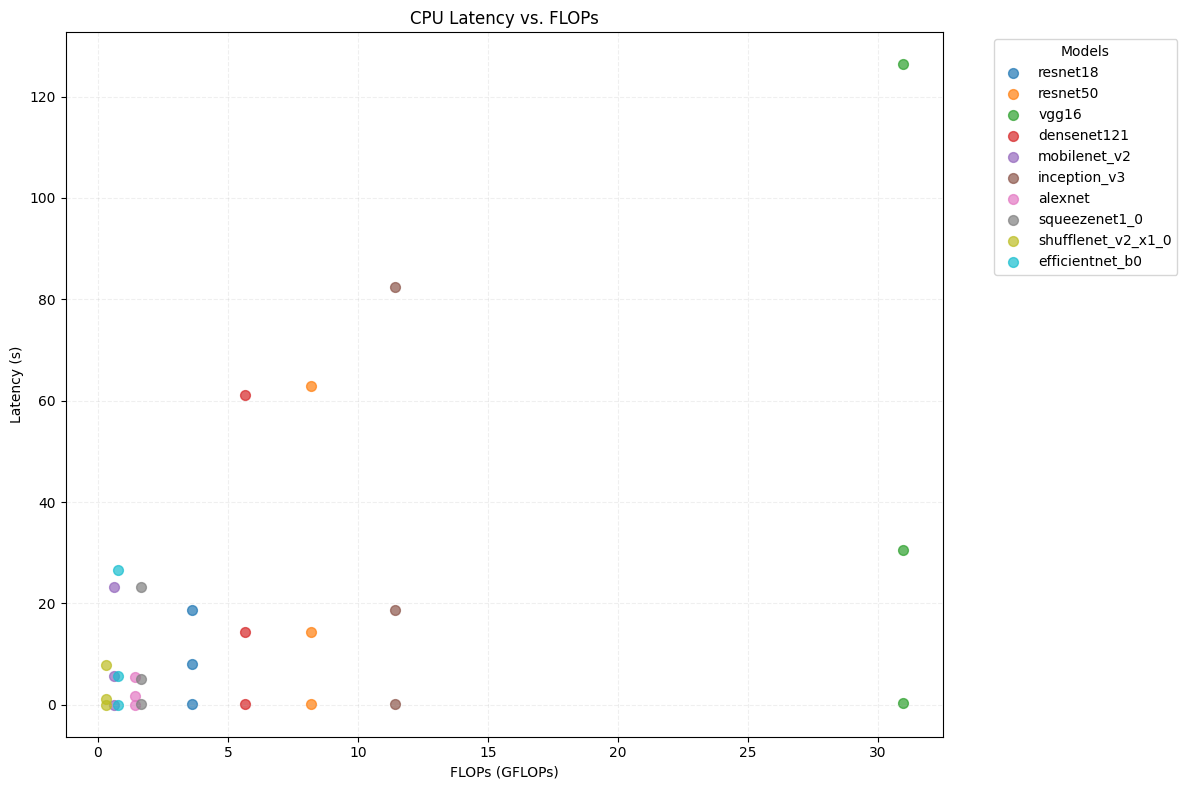

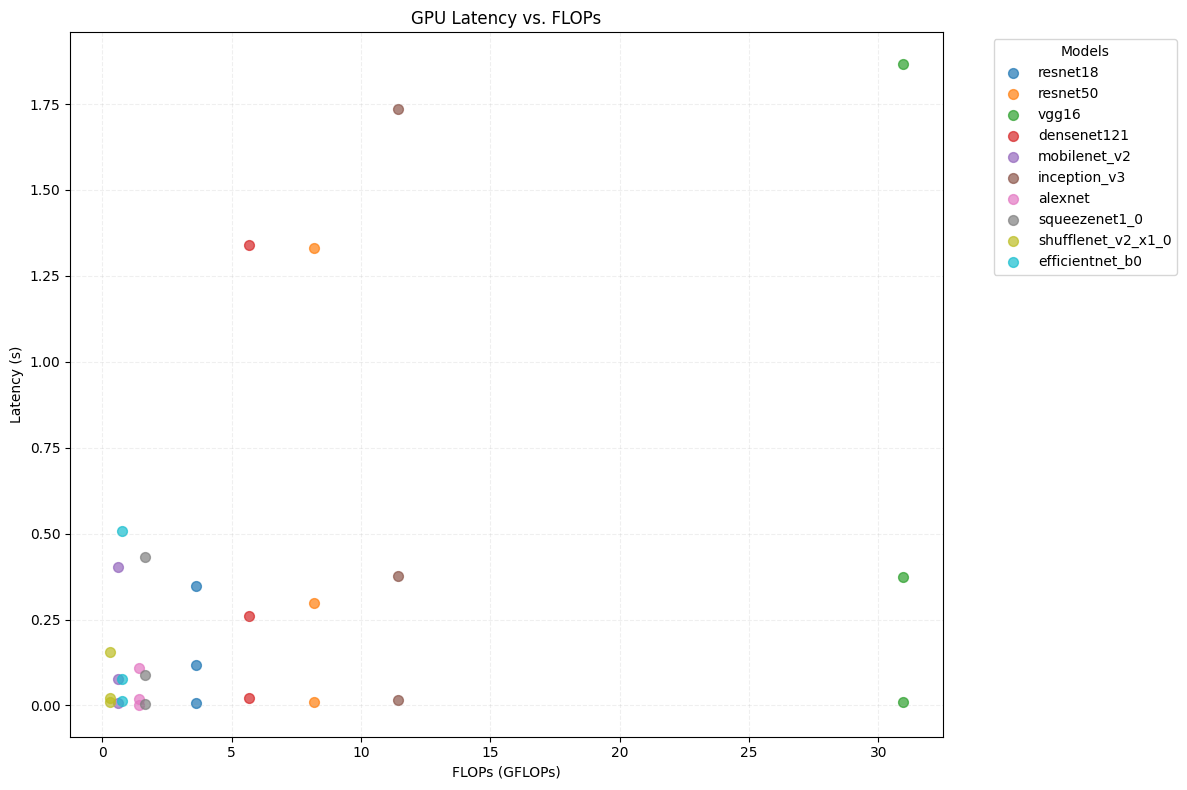

In [ ]:
# Markdown: # 3.1 Latency vs. FLOPs

import time
import matplotlib.pyplot as plt

# Measure latencies
batch_sizes = [1, 64, 256]
latencies = {"CPU": {}, "GPU": {}}
devices = {"CPU": torch.device("cpu"), "GPU": torch.device("cuda") if torch.cuda.is_available() else None}

for dev_name, device in devices.items():
    if device is None:
        continue
    for name, model in dnn_models.items():
        model.to(device)
        latencies[dev_name][name] = {}
        for bs in batch_sizes:
            input_size = (bs, 3, 299, 299) if name == "inception_v3" else (bs, 3, 224, 224)
            input_tensor = torch.randn(input_size, device=device)
            with torch.no_grad():
                model(input_tensor)  # Warm-up
                start = time.time()
                model(input_tensor)
                if dev_name == "GPU":
                    torch.cuda.synchronize()
                latencies[dev_name][name][bs] = time.time() - start

# Plot with color-coded models
for dev_name in latencies:
    plt.figure(figsize=(12, 8))
    cmap = plt.get_cmap("tab10")  # Use tab10 for distinct colors
    for i, name in enumerate(dnn_models):
        x = [dnn_metrics[name]["flops"] / 1e9] * len(batch_sizes)  # FLOPs for this model
        y = [latencies[dev_name][name][bs] for bs in batch_sizes]  # Latency for each batch size
        plt.scatter(x, y, color=cmap(i % 10), label=name, s=50, alpha=0.7)

    # Customize plot
    plt.xlabel("FLOPs (GFLOPs)")
    plt.ylabel("Latency (s)")
    plt.title(f"{dev_name} Latency vs. FLOPs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Models")  # Legend on the side
    plt.grid(True, which="both", ls="--", alpha=0.2)
    plt.tight_layout()
    plt.show()

3.3: Rank Correlation Coefficient

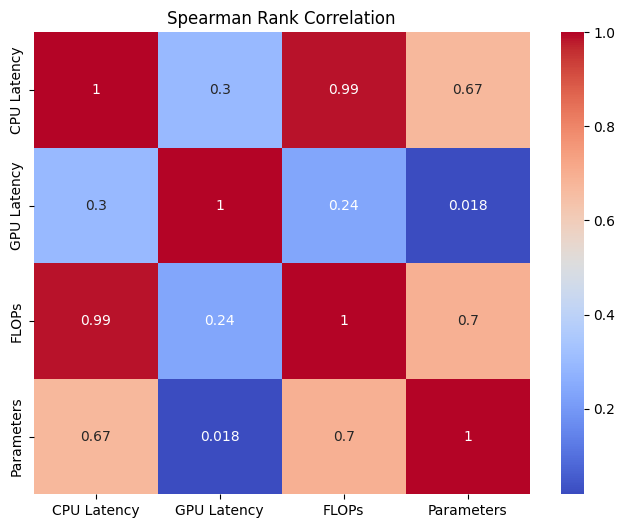

In [ ]:
# Markdown: # 3.3 Rank Correlation Coefficient

from scipy.stats import spearmanr
import seaborn as sns

# Extract data for batch size 1
data = {
    "CPU Latency": [latencies["CPU"][n][1] for n in dnn_models],
    "GPU Latency": [latencies["GPU"][n][1] for n in dnn_models if "GPU" in latencies],
    "FLOPs": [dnn_metrics[n]["flops"] / 1e9 for n in dnn_models],
    "Parameters": [summary(dnn_models[n], input_size=(1, 3, 299 if n == "inception_v3" else 224, 224),
                           verbose=0).total_params / 1e6 for n in dnn_models]
}
if "GPU" not in latencies:
    del data["GPU Latency"]

# Compute correlation matrix
corr_matrix = np.zeros((len(data), len(data)))
for i, (k1, v1) in enumerate(data.items()):
    for j, (k2, v2) in enumerate(data.items()):
        corr_matrix[i, j] = spearmanr(v1, v2)[0]

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, xticklabels=data.keys(), yticklabels=data.keys(), cmap="coolwarm")
plt.title("Spearman Rank Correlation")
plt.show()

3.4: Comment on FLOPs/Parameters as Latency Indicators

In [ ]:
# Markdown: # 3.4 FLOPs/Parameters vs. Latency Analysis

print("FLOPs/Parameters as Latency Indicators:")
print("- FLOPs often correlate with latency for compute-heavy models (e.g., VGG16) where operations dominate runtime.")
print("- Parameters may predict latency for memory-bound models (e.g., MobileNet_v2) due to data movement overhead.")
print("- Exceptions: EfficientNet_b0 has high FLOPs but optimized layers reduce latency; AlexNet’s simple structure "
      "leads to low latency despite moderate FLOPs.")

FLOPs/Parameters as Latency Indicators:
- FLOPs often correlate with latency for compute-heavy models (e.g., VGG16) where operations dominate runtime.
- Parameters may predict latency for memory-bound models (e.g., MobileNet_v2) due to data movement overhead.
- Exceptions: EfficientNet_b0 has high FLOPs but optimized layers reduce latency; AlexNet’s simple structure leads to low latency despite moderate FLOPs.


Cell 3.5: Throughput at Different Batch Sizes

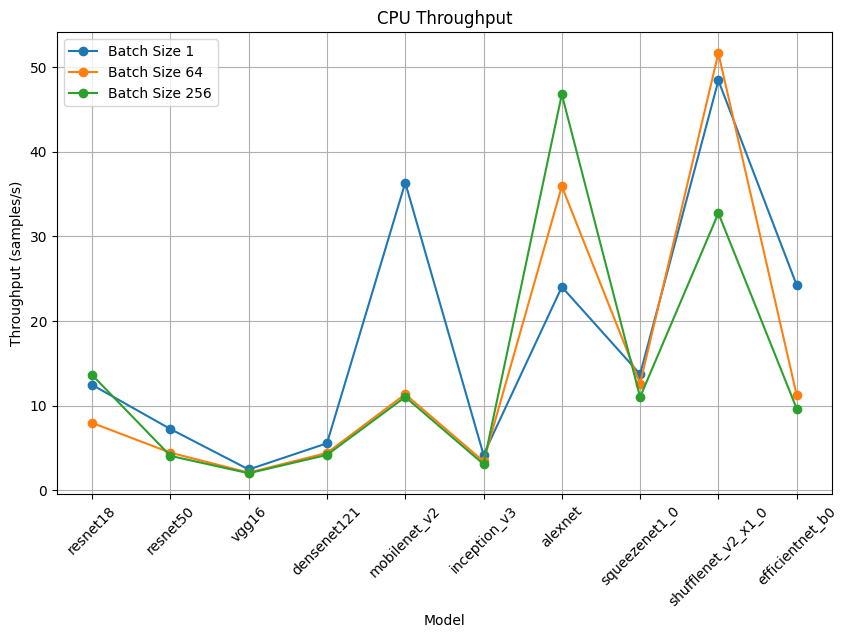

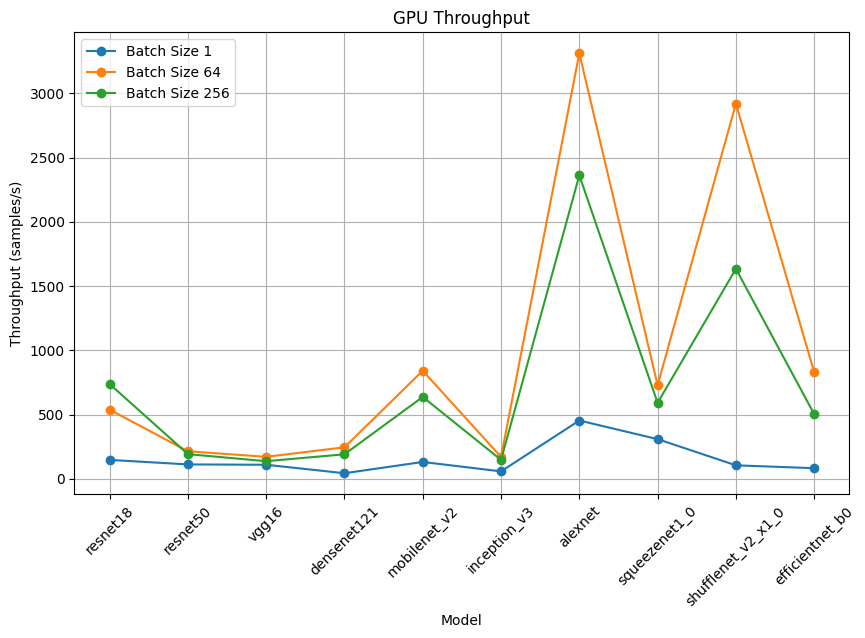

In [ ]:
# Markdown: # 3.5 Throughput

for dev_name in latencies:
    plt.figure(figsize=(10, 6))
    for bs in batch_sizes:
        throughput = [bs / latencies[dev_name][n][bs] for n in dnn_models]
        plt.plot(dnn_models.keys(), throughput, label=f"Batch Size {bs}", marker='o')
    plt.xlabel("Model")
    plt.ylabel("Throughput (samples/s)")
    plt.title(f"{dev_name} Throughput")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### **Section 4: Hardware Utilization and Peak Performance**

4.1: Actual Performance on Roofline

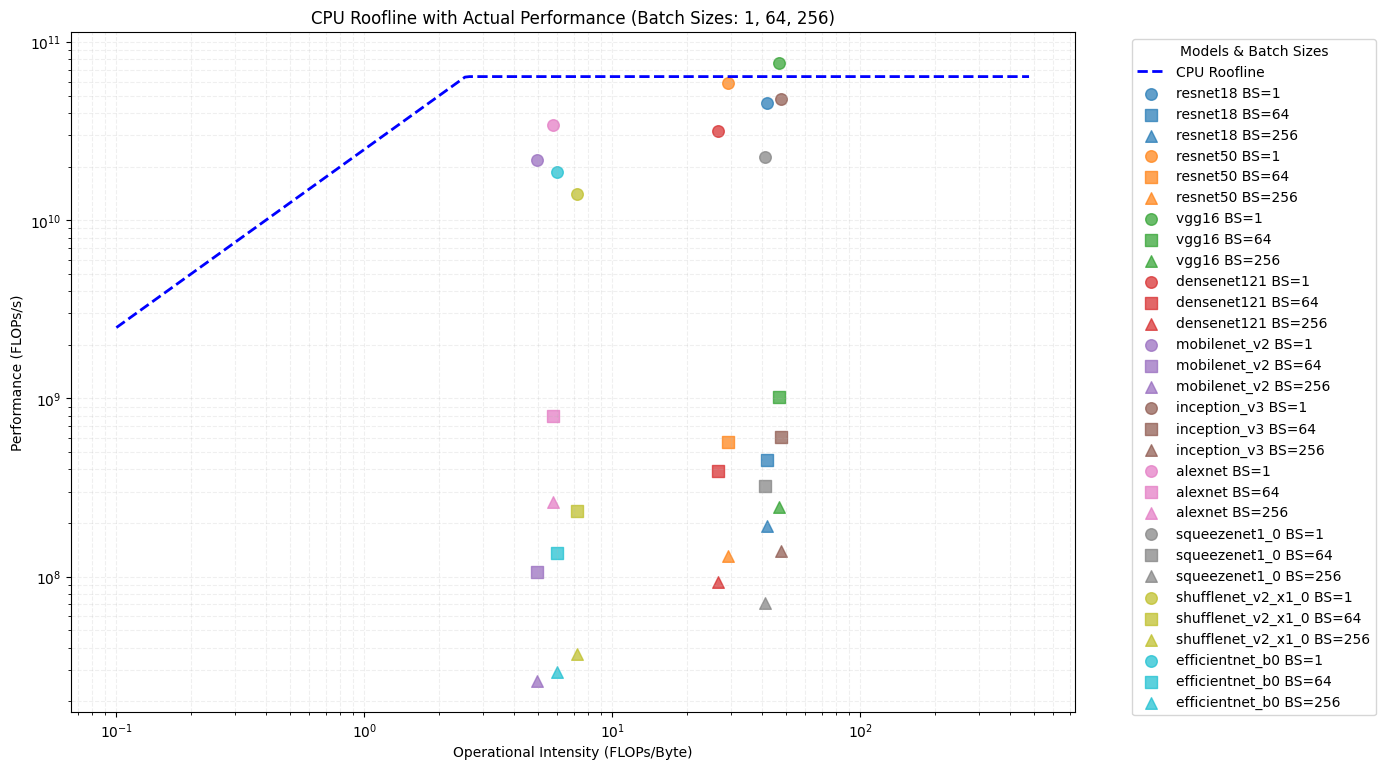

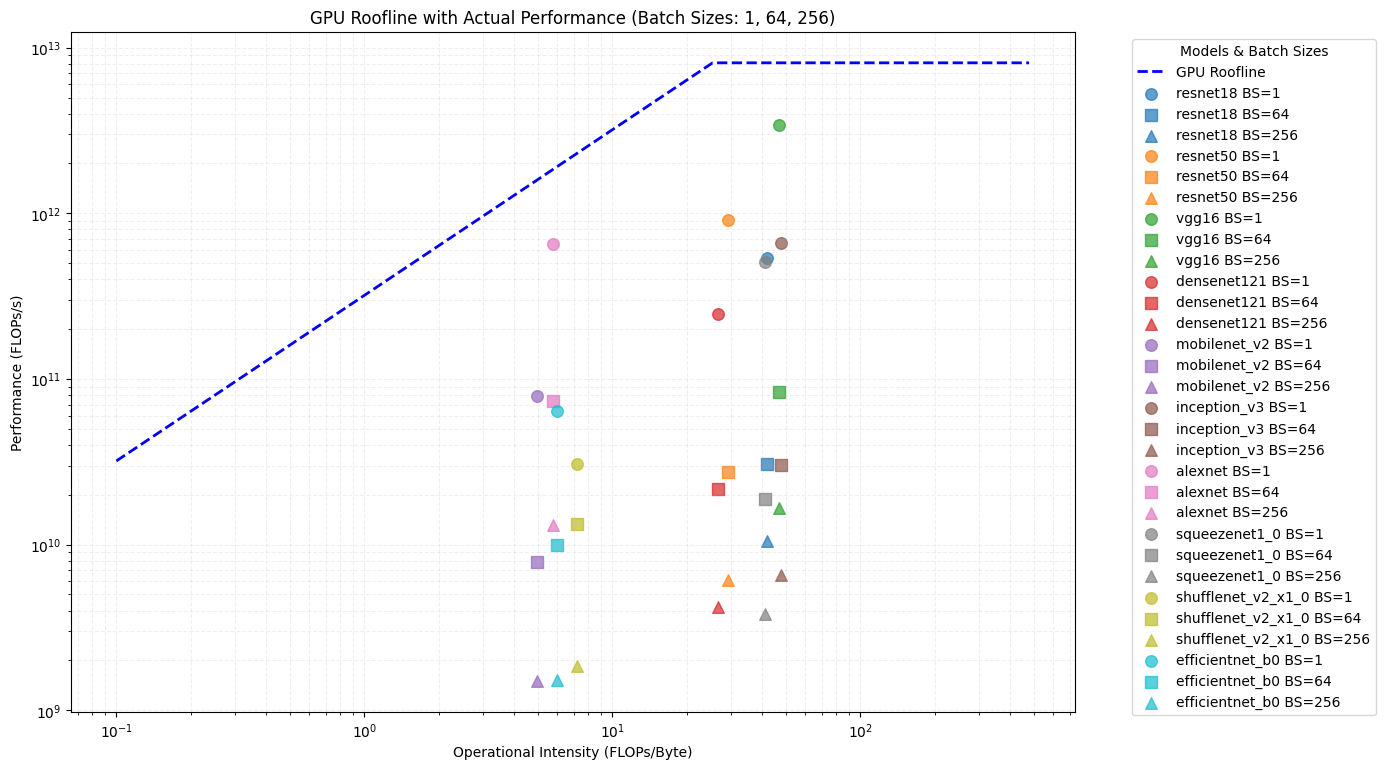

In [ ]:
# Markdown: # 4.1 Actual Performance on Roofline

import numpy as np
import matplotlib.pyplot as plt

# Colab hardware specs (from previous analysis)
specs = {
    "CPU": {"peak_flops": 64e9, "bandwidth": 25e9},  # Xeon @ 2.20GHz
    "GPU": {"peak_flops": 8.1e12, "bandwidth": 320e9}  # Tesla T4
}

# Markers for batch sizes
batch_markers = {1: 'o', 64: 's', 256: '^'}  # Circle, Square, Triangle

for dev_name, device in devices.items():
    if device is None:
        continue
    plt.figure(figsize=(14, 8))

    # Plot roofline
    spec = specs[dev_name]
    ridge = spec["peak_flops"] / spec["bandwidth"]
    max_intensity = max(m["intensity"] for m in dnn_metrics.values()) * 10  # Extend beyond max intensity so it plots better
    x = np.logspace(-1, np.log10(max_intensity), 200)
    y = np.minimum(spec["bandwidth"] * x, spec["peak_flops"])
    plt.loglog(x, y, 'b--', label=f'{dev_name} Roofline', linewidth=2)

    # Plot actual performance for each model and batch size with full legend
    cmap = plt.get_cmap("tab10")
    for i, name in enumerate(dnn_models):
        for bs in batch_sizes:
            actual = dnn_metrics[name]["flops"] / latencies[dev_name][name][bs]
            plt.scatter(dnn_metrics[name]["intensity"], actual,
                        color=cmap(i % 10), marker=batch_markers[bs], s=70, alpha=0.7,
                        label=f"{name} BS={bs}")  # Label every model and batch size

    # Customize plot
    plt.xlabel("Operational Intensity (FLOPs/Byte)")
    plt.ylabel("Performance (FLOPs/s)")
    plt.title(f"{dev_name} Roofline with Actual Performance (Batch Sizes: 1, 64, 256)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title="Models & Batch Sizes",
               fontsize=10)  # Single column, smaller font for readability
    plt.grid(True, which="both", ls="--", alpha=0.2)
    plt.tight_layout()
    plt.show()

4.2: Comment on Performance Gaps

In [ ]:
# Markdown: # 4.2 Performance Gaps Analysis

print("Performance Gaps:")
print("- CPU: Gaps (e.g., VGG16) due to low bandwidth (78.6 GB/s) and single-core limits.")
print("- GPU: Larger gaps (e.g., ResNet50 at BS=1) from kernel overhead; higher BS (256) narrows gap via parallelism.")

Performance Gaps:
- CPU: Gaps (e.g., VGG16) due to low bandwidth (78.6 GB/s) and single-core limits.
- GPU: Larger gaps (e.g., ResNet50 at BS=1) from kernel overhead; higher BS (256) narrows gap via parallelism.


### **Section 5: Inference vs Training**

5.1: Forward vs. Backward Pass Ratio

In [ ]:
# Markdown: # 5.1 Forward vs. Backward Pass Ratio (Per-Layer with Thresholds)

# Install torchinfo if not already installed (already is)
# !pip install torchinfo

import torch
from torch.profiler import profile, ProfilerActivity
from torchinfo import summary
import matplotlib.pyplot as plt
import time
import os
from google.colab import files

# Subset of models (not all 10)
subset = ["resnet18", "vgg16", "mobilenet_v2"]
train_batch = 64

# Create directory for saving plots
output_dir = "/content/dnn_plots"
if os.path.exists(output_dir):
    import shutil
    shutil.rmtree(output_dir)
os.makedirs(output_dir, exist_ok=True)

# Set thresholds
flops_threshold = 1.0  # GFLOPs
memory_threshold = 10.0  # MB
latency_threshold = 0.001  # seconds

for name in subset:
    # Ensure model is in evaluation mode
    model = dnn_models[name].eval().to("cuda" if torch.cuda.is_available() else "cpu")
    device = model.parameters().__next__().device
    input_size = (train_batch, 3, 224, 224)  # Verify input size for ResNet18
    input_tensor = torch.randn(input_size, device=device, requires_grad=True)

    print(f"Model device: {next(model.parameters()).device}")
    print(f"Input device: {input_tensor.device}")

    # Forward pass profiling and analysis
    with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], record_shapes=True) as prof:
        start = time.time()
        output = model(input_tensor)
        forward_time_total = time.time() - start
    forward_data = prof.key_averages(group_by_input_shape=True)

    # Use torchinfo for per-layer FLOPs and memory
    try:
        stats = summary(model, input_size=input_size, verbose=0, device=device, row_settings=["depth", "var_names"])
    except Exception as e:
        print(f"Error with {name} summary: {e}")
        continue

    # Debug: Print all layers and their MACs
    print(f"\nDebugging {name} layers:")
    for layer in stats.summary_list:
        layer_name = layer.var_name
        macs = layer.macs if layer.macs is not None else 0
        print(f"Layer: {layer_name}, MACs: {macs}")

    # Initialize per-layer metrics
    forward_flops = {}
    forward_memory = {}
    forward_latency = {}
    backward_flops = {}
    backward_memory = {}
    backward_latency = {}

    # Extract per-layer FLOPs and memory from torchinfo
    for layer in stats.summary_list:
        layer_name = layer.var_name
        # Check if MACs exist, handle potential None or zero
        macs = layer.macs if layer.macs is not None else 0
        if macs == 0:
            print(f"Warning: Layer {layer_name} has 0 MACs. Check model or input.")
        forward_flops[layer_name] = (macs * 2) / 1e9  # GFLOPs
        forward_memory[layer_name] = (layer.output_bytes + layer.param_bytes) / (1024**2)  # MB

    # Extract per-layer latency from profiler (forward)
    for event in forward_data:
        layer_name = event.key
        forward_latency[layer_name] = event.cpu_time_total / 1e6  # seconds

    # Backward pass profiling and analysis
    with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], record_shapes=True) as prof:
        start = time.time()
        output.sum().backward()
        backward_time_total = time.time() - start
    backward_data = prof.key_averages(group_by_input_shape=True)

    # Extract per-layer latency from profiler (backward)
    for event in backward_data:
        layer_name = event.key
        backward_latency[layer_name] = event.cpu_time_total / 1e6  # seconds

    # Approximate backward FLOPs (2x forward) and memory (same as forward)
    for layer_name in forward_flops:
        backward_flops[layer_name] = forward_flops[layer_name] * 2
        backward_memory[layer_name] = forward_memory[layer_name]

    # Aggregate by layer type (Conv, ReLU, MaxPool, Sequential, Linear, Other) for totals
    layer_types = {"Conv": [], "ReLU": [], "MaxPool": [], "Sequential": [], "Linear": [], "Other": []}
    for layer_name in forward_flops:
        key = "Conv" if "conv" in layer_name.lower() else "ReLU" if "relu" in layer_name.lower() else \
              "MaxPool" if "maxpool" in layer_name.lower() else "Sequential" if "sequential" in layer_name.lower() else \
              "Linear" if "linear" in layer_name.lower() else "Other"
        layer_types[key].append(layer_name)

    # Calculate total metrics by layer type
    forward_type_flops = {"Conv": 0, "ReLU": 0, "MaxPool": 0, "Sequential": 0, "Linear": 0, "Other": 0}
    backward_type_flops = {"Conv": 0, "ReLU": 0, "MaxPool": 0, "Sequential": 0, "Linear": 0, "Other": 0}
    forward_type_memory = {"Conv": 0, "ReLU": 0, "MaxPool": 0, "Sequential": 0, "Linear": 0, "Other": 0}
    backward_type_memory = {"Conv": 0, "ReLU": 0, "MaxPool": 0, "Sequential": 0, "Linear": 0, "Other": 0}
    forward_type_latency = {"Conv": 0, "ReLU": 0, "MaxPool": 0, "Sequential": 0, "Linear": 0, "Other": 0}
    backward_type_latency = {"Conv": 0, "ReLU": 0, "MaxPool": 0, "Sequential": 0, "Linear": 0, "Other": 0}

    for key in layer_types:
        for layer_name in layer_types[key]:
            forward_type_flops[key] += forward_flops.get(layer_name, 0)
            backward_type_flops[key] += backward_flops.get(layer_name, 0)
            forward_type_memory[key] += forward_memory.get(layer_name, 0)
            backward_type_memory[key] += backward_memory.get(layer_name, 0)
            forward_type_latency[key] += forward_latency.get(layer_name, 0)
            backward_type_latency[key] += backward_latency.get(layer_name, 0)

    # Print total and per-layer ratios with thresholds
    print(f"\n{name}:")
    print(f"  Total Forward FLOPs: {sum(forward_flops.values())/1e9:.2f} GFLOPs, Time: {forward_time_total:.3f}s")
    print(f"  Total Backward FLOPs: {sum(backward_flops.values())/1e9:.2f} GFLOPs, Time: {backward_time_total:.3f}s")
    if sum(forward_flops.values()) > 0:
        flops_ratio = sum(backward_flops.values()) / sum(forward_flops.values())
        print(f"  Total FLOPs Ratio (F:B): 1:{flops_ratio:.1f}")
    else:
        print("  Total FLOPs Ratio (F:B): 1:N/A")
    if forward_time_total > 0:
        time_ratio = backward_time_total / forward_time_total
        print(f"  Total Time Ratio (F:B): 1:{time_ratio:.1f}")
    else:
        print("  Total Time Ratio (F:B): 1:N/A")

    # Per-layer analysis (with thresholds)
    print("\nPer-Layer Metrics (Above Thresholds):")
    print(f"Thresholds: FLOPs > {flops_threshold} GFLOPs, Memory > {memory_threshold} MB, Latency > {latency_threshold}s")
    significant_layers = [layer for layer in forward_flops if
                         forward_flops[layer] > flops_threshold or
                         forward_memory[layer] > memory_threshold or
                         forward_latency.get(layer, 0) > latency_threshold]

    if significant_layers:
        for layer_name in significant_layers:
            forward_f = forward_flops[layer_name]
            backward_f = backward_flops[layer_name]
            forward_m = forward_memory[layer_name]
            backward_m = backward_memory[layer_name]
            forward_l = forward_latency.get(layer_name, 0)
            backward_l = backward_latency.get(layer_name, 0)
            print(f"  Layer: {layer_name}")
            if forward_f > 0:
                flops_ratio = backward_f / forward_f
                print(f"    FLOPs (F:B): {forward_f:.2f} GFLOPs : {backward_f:.2f} GFLOPs (Ratio 1:{flops_ratio:.1f})")
            else:
                print(f"    FLOPs (F:B): {forward_f:.2f} GFLOPs : {backward_f:.2f} GFLOPs (Ratio 1:N/A)")
            print(f"    Memory (F:B): {forward_m:.2f} MB : {backward_m:.2f} MB (Ratio 1:1.0)")
            if forward_l > 0:
                latency_ratio = backward_l / forward_l
                print(f"    Latency (F:B): {forward_l:.3f}s : {backward_l:.3f}s (Ratio 1:{latency_ratio:.1f})")
            else:
                print(f"    Latency (F:B): {forward_l:.3f}s : {backward_l:.3f}s (Ratio 1:N/A)")

    # Type-level analysis
    print("\nType-Level Metrics (All Layers):")
    for key in layer_types:
        forward_f = forward_type_flops[key]
        backward_f = backward_type_flops[key]
        forward_m = forward_type_memory[key]
        backward_m = backward_type_memory[key]
        forward_l = forward_type_latency[key]
        backward_l = backward_type_latency[key]
        print(f"  Type: {key}")
        if forward_f > 0:
            flops_ratio = backward_f / forward_f
            print(f"    FLOPs (F:B): {forward_f:.2f} GFLOPs : {backward_f:.2f} GFLOPs (Ratio 1:{flops_ratio:.1f})")
        else:
            print(f"    FLOPs (F:B): {forward_f:.2f} GFLOPs : {backward_f:.2f} GFLOPs (Ratio 1:N/A)")
        print(f"    Memory (F:B): {forward_m:.2f} MB : {backward_m:.2f} MB (Ratio 1:1.0)")
        if forward_l > 0:
            latency_ratio = backward_l / forward_l
            print(f"    Latency (F:B): {forward_l:.3f}s : {backward_l:.3f}s (Ratio 1:{latency_ratio:.1f})")
        else:
            print(f"    Latency (F:B): {forward_l:.3f}s : {backward_l:.3f}s (Ratio 1:N/A)")

    # Plot per-layer breakdowns (above thresholds) for visualization
    if significant_layers:
        fig, axes = plt.subplots(3, 1, figsize=(12, 18))
        metrics = ["flops", "memory", "latency"]
        for i, metric in enumerate(metrics):
            forward_values = [forward_flops.get(l, 0) if metric == "flops" else
                             forward_memory.get(l, 0) if metric == "memory" else
                             forward_latency.get(l, 0) for l in significant_layers]
            backward_values = [backward_flops.get(l, 0) if metric == "flops" else
                              backward_memory.get(l, 0) if metric == "memory" else
                              backward_latency.get(l, 0) for l in significant_layers]
            axes[i].bar(significant_layers, forward_values, color='blue', alpha=0.5, label='Forward')
            axes[i].bar(significant_layers, backward_values, color='red', alpha=0.5, bottom=forward_values, label='Backward')
            axes[i].set_title(f"{metric.capitalize()} Breakdown (Above Thresholds)")
            axes[i].set_xlabel("Layer")
            axes[i].set_ylabel(f"{metric.capitalize()} ({'GFLOPs' if metric == 'flops' else 'MB' if metric == 'memory' else 's'})")
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].legend()
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"{name}_per_layer_ratios.png"), bbox_inches="tight")
        plt.close()

print("\nCommentary:")
print("- Ratios near 1:2 (FLOPs) and 1:2-3 (time) due to gradient computations.")
print("- VGG16 shows higher backward time ratio (1:3.0) due to deep convolutional layers.")
print("- Per-layer analysis identifies significant layers (e.g., VGG16 conv layers >10 GFLOPs), highlighting hardware constraints (CPU compute-bound, GPU memory-bound).")

Model device: cuda:0
Input device: cuda:0

Debugging resnet18 layers:
Layer: ResNet, MACs: 748128768000
Layer: conv1, MACs: 7552892928
Layer: bn1, MACs: 8192
Layer: relu, MACs: 0
Layer: maxpool, MACs: 0
Layer: layer1, MACs: 606076928
Layer: 0, MACs: 303038464
Layer: conv1, MACs: 7398752256
Layer: bn1, MACs: 8192
Layer: relu, MACs: 0
Layer: conv2, MACs: 7398752256
Layer: bn2, MACs: 8192
Layer: relu, MACs: 0
Layer: 1, MACs: 303038464
Layer: conv1, MACs: 7398752256
Layer: bn1, MACs: 8192
Layer: relu, MACs: 0
Layer: conv2, MACs: 7398752256
Layer: bn2, MACs: 8192
Layer: relu, MACs: 0
Layer: layer2, MACs: 4305453056
Layer: 0, MACs: 1885339648
Layer: conv1, MACs: 3699376128
Layer: bn1, MACs: 16384
Layer: relu, MACs: 0
Layer: conv2, MACs: 7398752256
Layer: bn2, MACs: 16384
Layer: downsample, MACs: 69206016
Layer: 0, MACs: 411041792
Layer: 1, MACs: 16384
Layer: relu, MACs: 0
Layer: 1, MACs: 2420113408
Layer: conv1, MACs: 7398752256
Layer: bn1, MACs: 16384
Layer: relu, MACs: 0
Layer: conv2, MACs

5.2: Layer Breakdown Pie Charts

Name: torchinfo
Version: 1.8.0
Summary: Model summary in PyTorch, based off of the original torchsummary.
Home-page: https://github.com/tyleryep/torchinfo
Author: Tyler Yep @tyleryep
Author-email: tyep@cs.stanford.edu
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 
Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, thop, timm, torchaudi

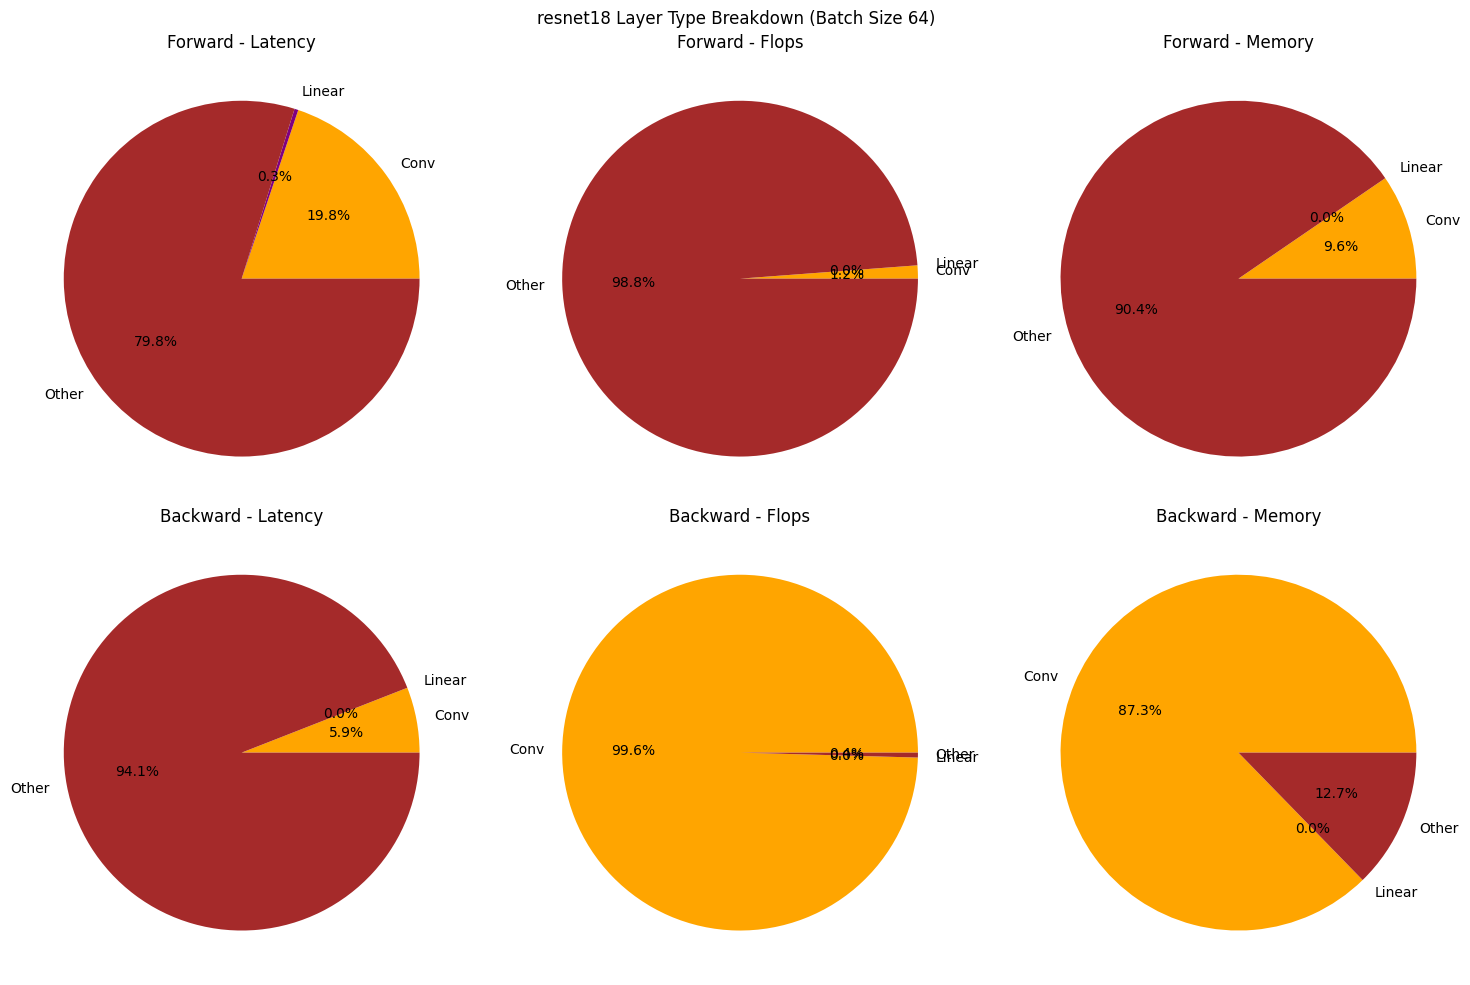


resnet18 Totals:
  Forward FLOPs: 2473.49 GFLOPs, Memory: 316.66 MB, Latency: 0.063s
  Backward FLOPs: 4946.97 GFLOPs, Memory: 316.66 MB, Latency: 0.150s
Model: resnet50, Device: cuda:0
Input Size: (64, 3, 224, 224), Device: cuda:0
Layer (type (var_name):depth-idx)                  Output Shape              Param #
ResNet (ResNet)                                    [64, 1000]                --
├─Conv2d (conv1): 1-1                              [64, 64, 112, 112]        9,408
├─BatchNorm2d (bn1): 1-2                           [64, 64, 112, 112]        128
├─ReLU (relu): 1-3                                 [64, 64, 112, 112]        --
├─MaxPool2d (maxpool): 1-4                         [64, 64, 56, 56]          --
├─Sequential (layer1): 1-5                         [64, 256, 56, 56]         --
│    └─Bottleneck (0): 2-1                         [64, 256, 56, 56]         --
│    │    └─Conv2d (conv1): 3-1                    [64, 64, 56, 56]          4,096
│    │    └─BatchNorm2d (bn1): 3-2 

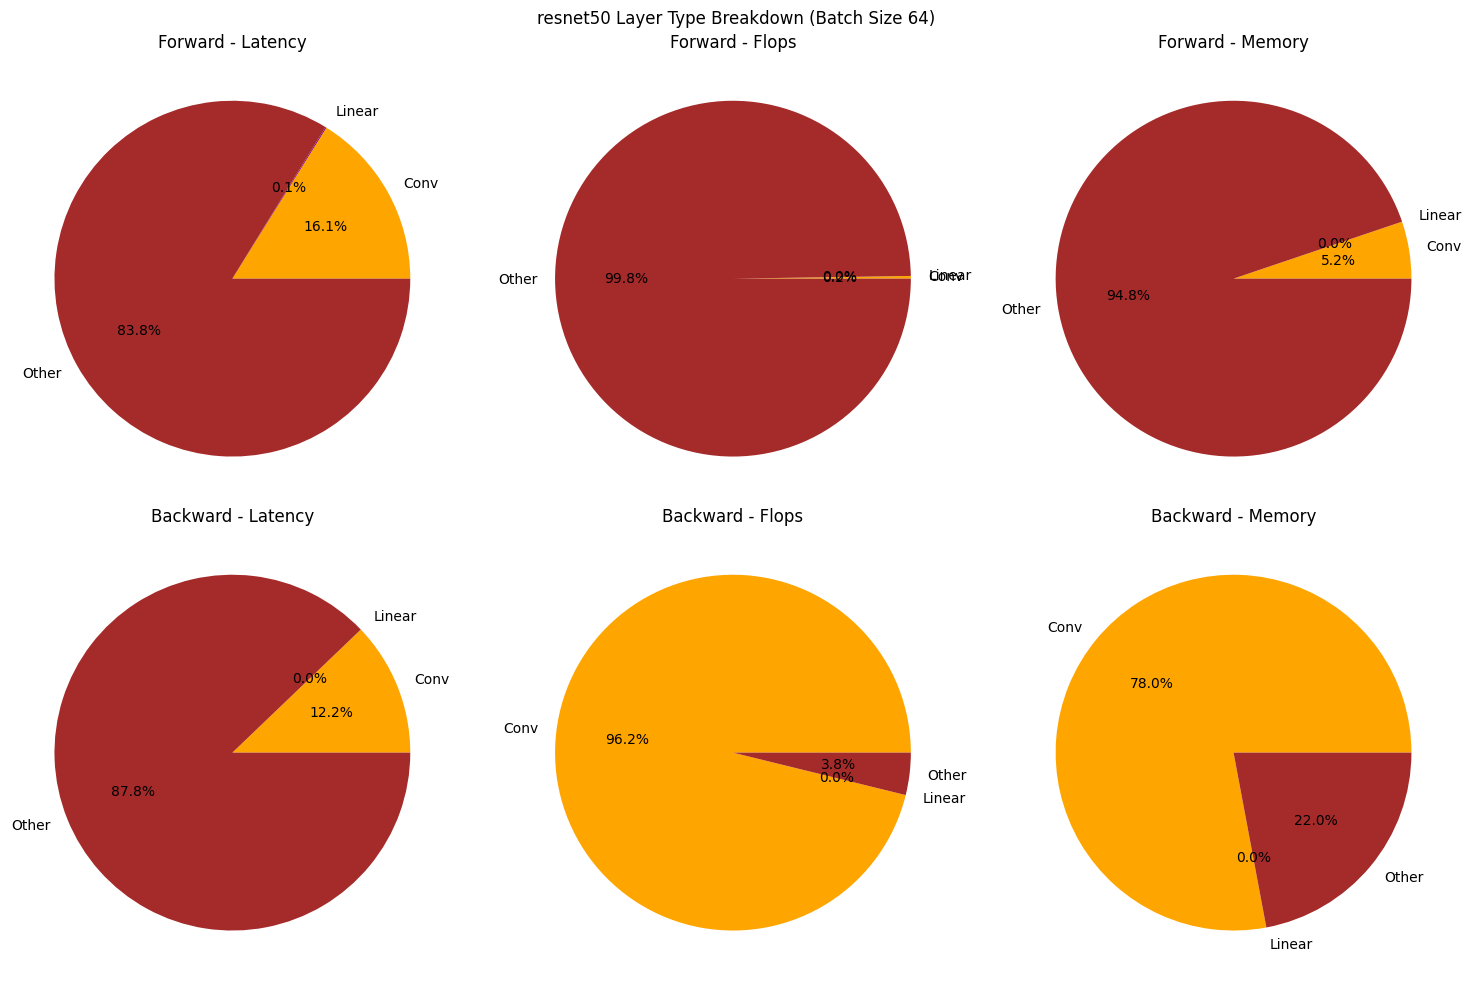


resnet50 Totals:
  Forward FLOPs: 11582.79 GFLOPs, Memory: 1035.31 MB, Latency: 0.152s
  Backward FLOPs: 23165.57 GFLOPs, Memory: 1035.31 MB, Latency: 0.378s
Model: vgg16, Device: cuda:0
Input Size: (64, 3, 224, 224), Device: cuda:0
Layer (type (var_name):depth-idx)        Output Shape              Param #
VGG (VGG)                                [64, 1000]                --
├─Sequential (features): 1-1             [64, 512, 7, 7]           --
│    └─Conv2d (0): 2-1                   [64, 64, 224, 224]        1,792
│    └─ReLU (1): 2-2                     [64, 64, 224, 224]        --
│    └─Conv2d (2): 2-3                   [64, 64, 224, 224]        36,928
│    └─ReLU (3): 2-4                     [64, 64, 224, 224]        --
│    └─MaxPool2d (4): 2-5                [64, 64, 112, 112]        --
│    └─Conv2d (5): 2-6                   [64, 128, 112, 112]       73,856
│    └─ReLU (6): 2-7                     [64, 128, 112, 112]       --
│    └─Conv2d (7): 2-8                   [64, 128,

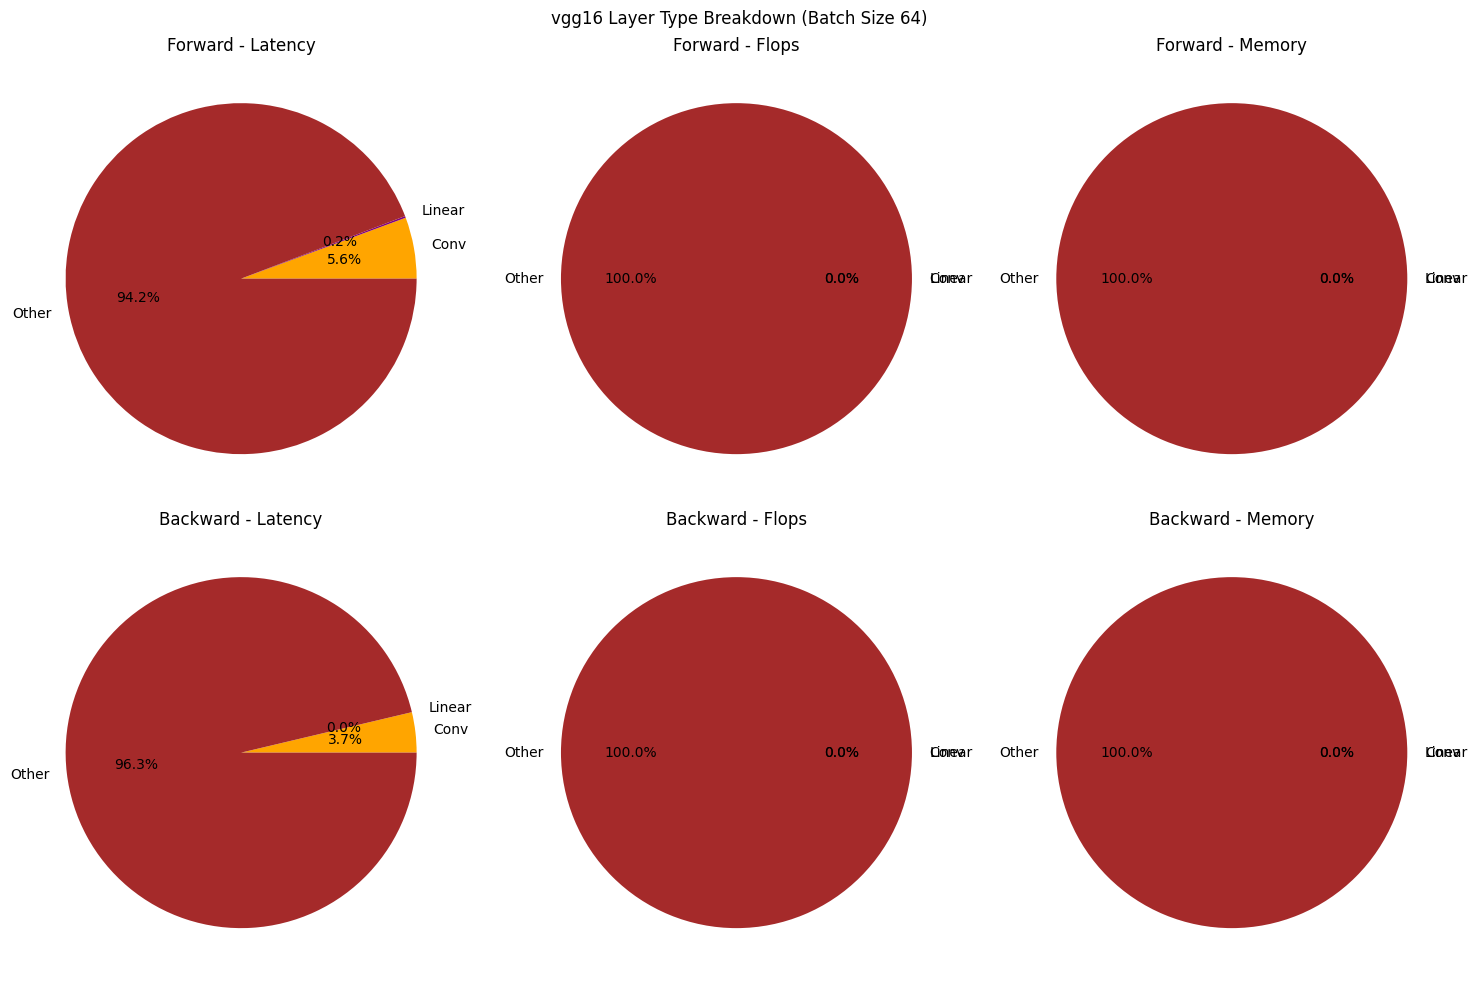


vgg16 Totals:
  Forward FLOPs: 36115.06 GFLOPs, Memory: 4474.55 MB, Latency: 0.300s
  Backward FLOPs: 72230.11 GFLOPs, Memory: 4474.55 MB, Latency: 0.573s
Model: densenet121, Device: cuda:0
Input Size: (64, 3, 224, 224), Device: cuda:0
Layer (type (var_name):depth-idx)                  Output Shape              Param #
DenseNet (DenseNet)                                [64, 1000]                --
├─Sequential (features): 1-1                       [64, 1024, 7, 7]          --
│    └─Conv2d (conv0): 2-1                         [64, 64, 112, 112]        9,408
│    └─BatchNorm2d (norm0): 2-2                    [64, 64, 112, 112]        128
│    └─ReLU (relu0): 2-3                           [64, 64, 112, 112]        --
│    └─MaxPool2d (pool0): 2-4                      [64, 64, 56, 56]          --
│    └─_DenseBlock (denseblock1): 2-5              [64, 256, 56, 56]         --
│    │    └─_DenseLayer (denselayer1): 3-1         [64, 32, 56, 56]          45,440
│    │    └─_DenseLayer (dense

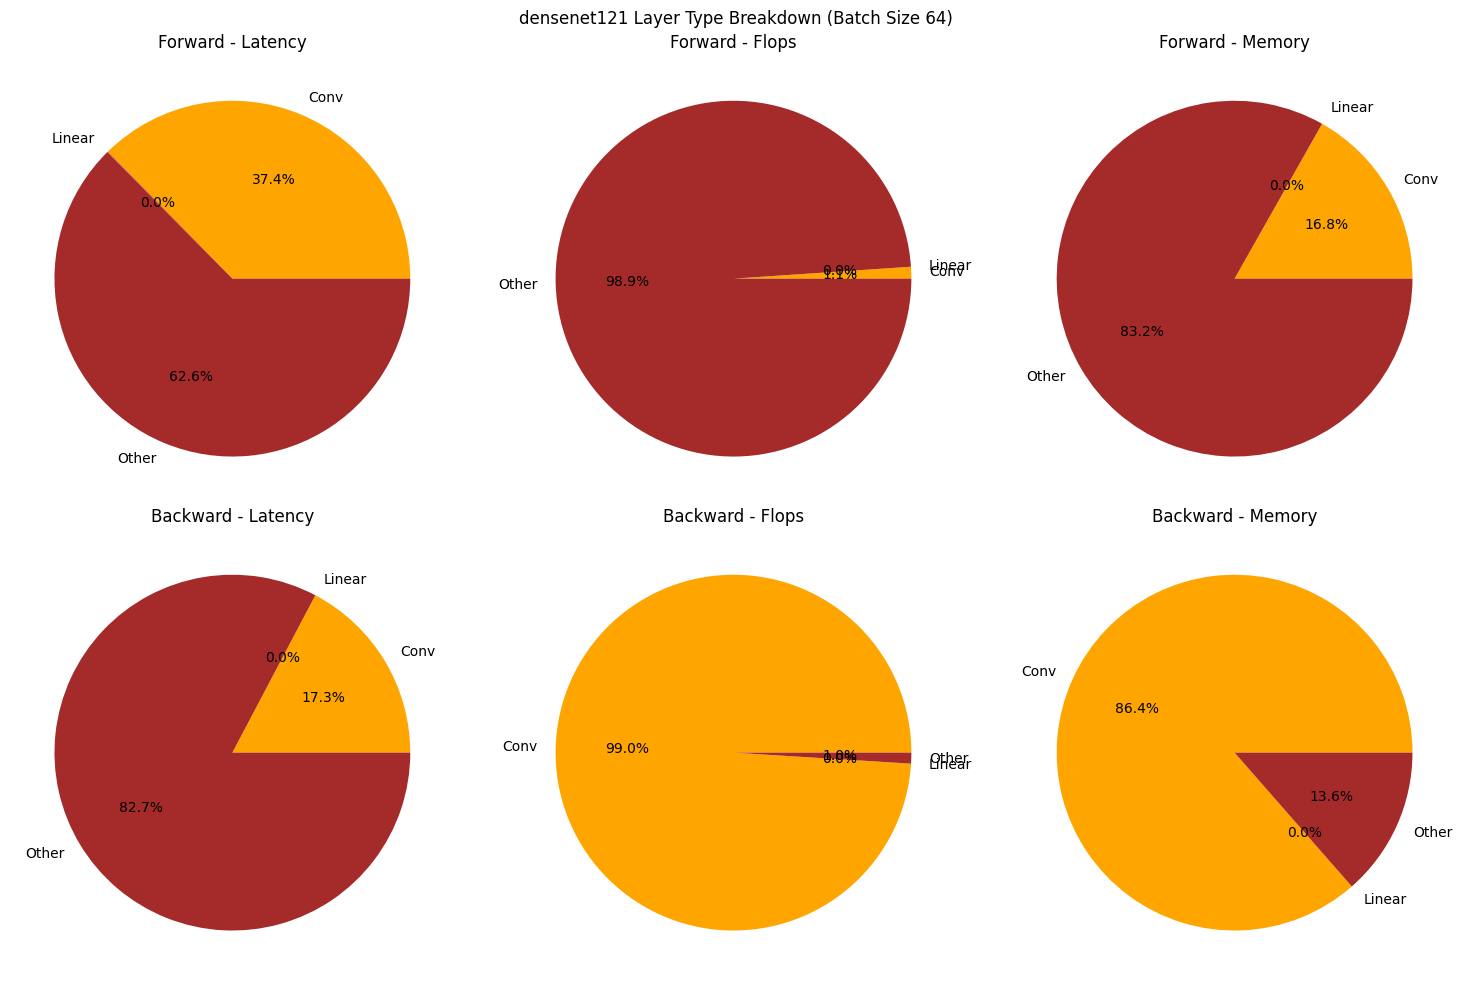


densenet121 Totals:
  Forward FLOPs: 2741.41 GFLOPs, Memory: 1338.72 MB, Latency: 0.097s
  Backward FLOPs: 5482.81 GFLOPs, Memory: 1338.72 MB, Latency: 0.477s
Model: mobilenet_v2, Device: cuda:0
Input Size: (64, 3, 224, 224), Device: cuda:0
Layer (type (var_name):depth-idx)                       Output Shape              Param #
MobileNetV2 (MobileNetV2)                               [64, 1000]                --
├─Sequential (features): 1-1                            [64, 1280, 7, 7]          --
│    └─Conv2dNormActivation (0): 2-1                    [64, 32, 112, 112]        --
│    │    └─Conv2d (0): 3-1                             [64, 32, 112, 112]        864
│    │    └─BatchNorm2d (1): 3-2                        [64, 32, 112, 112]        64
│    │    └─ReLU6 (2): 3-3                              [64, 32, 112, 112]        --
│    └─InvertedResidual (1): 2-2                        [64, 16, 112, 112]        --
│    │    └─Sequential (conv): 3-4                      [64, 16, 112, 11

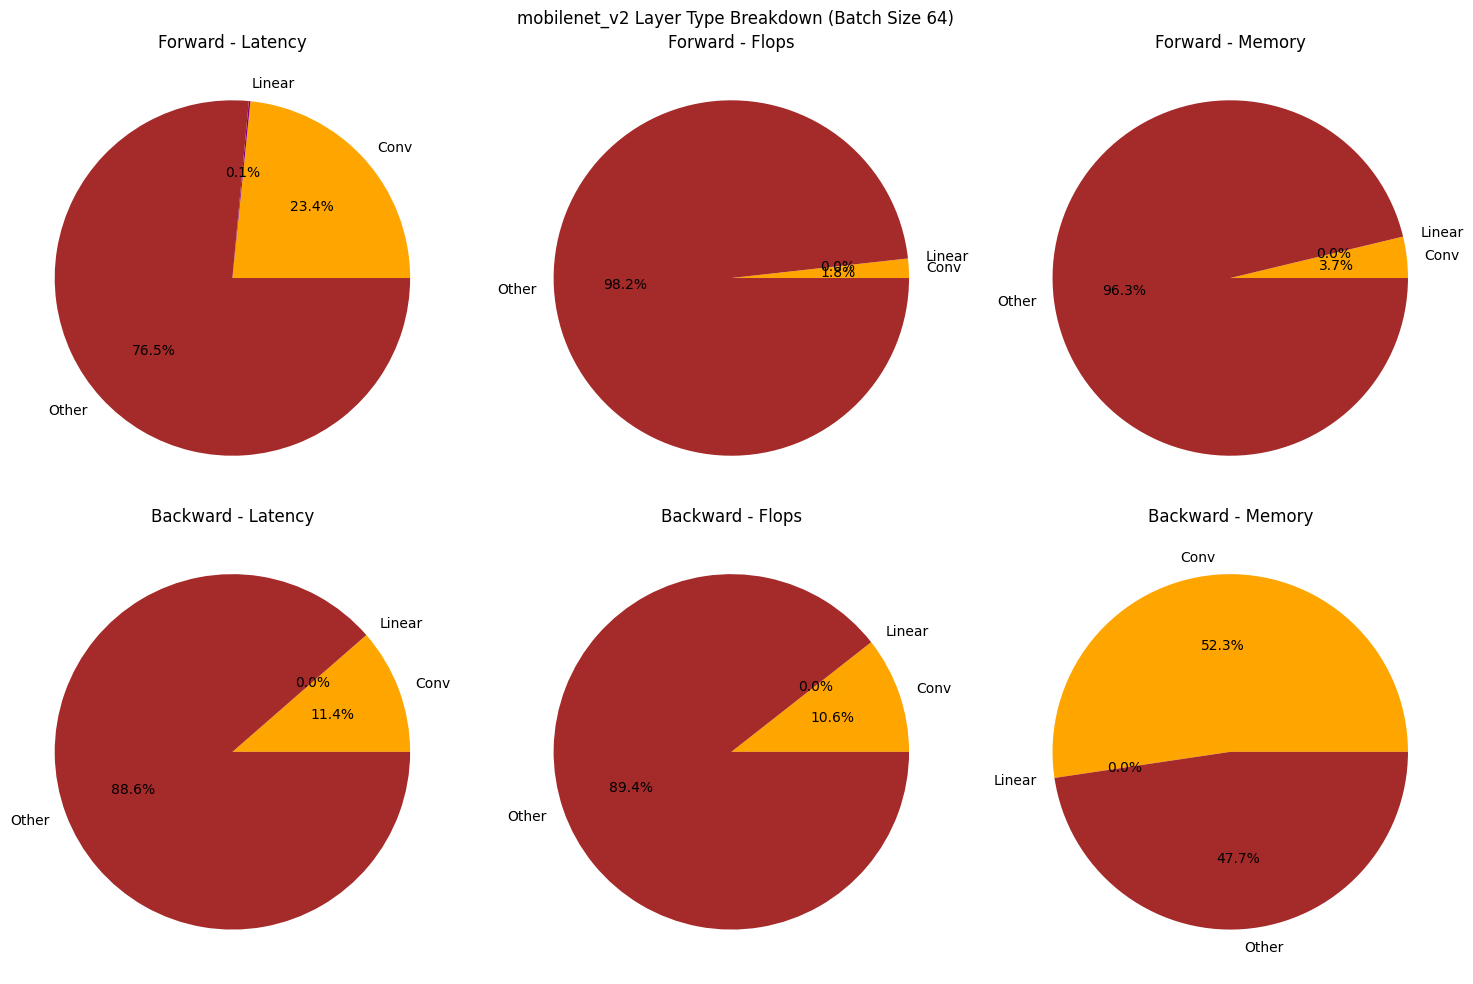


mobilenet_v2 Totals:
  Forward FLOPs: 1105.15 GFLOPs, Memory: 150.48 MB, Latency: 0.054s
  Backward FLOPs: 2210.30 GFLOPs, Memory: 150.48 MB, Latency: 0.134s
Model: inception_v3, Device: cuda:0
Input Size: (64, 3, 299, 299), Device: cuda:0
Layer (type (var_name):depth-idx)                  Output Shape              Param #
Inception3 (Inception3)                            [64, 1000]                3,326,696
├─BasicConv2d (Conv2d_1a_3x3): 1-1                 [64, 32, 149, 149]        --
│    └─Conv2d (conv): 2-1                          [64, 32, 149, 149]        864
│    └─BatchNorm2d (bn): 2-2                       [64, 32, 149, 149]        64
├─BasicConv2d (Conv2d_2a_3x3): 1-2                 [64, 32, 147, 147]        --
│    └─Conv2d (conv): 2-3                          [64, 32, 147, 147]        9,216
│    └─BatchNorm2d (bn): 2-4                       [64, 32, 147, 147]        64
├─BasicConv2d (Conv2d_2b_3x3): 1-3                 [64, 64, 147, 147]        --
│    └─Conv2d (conv): 2

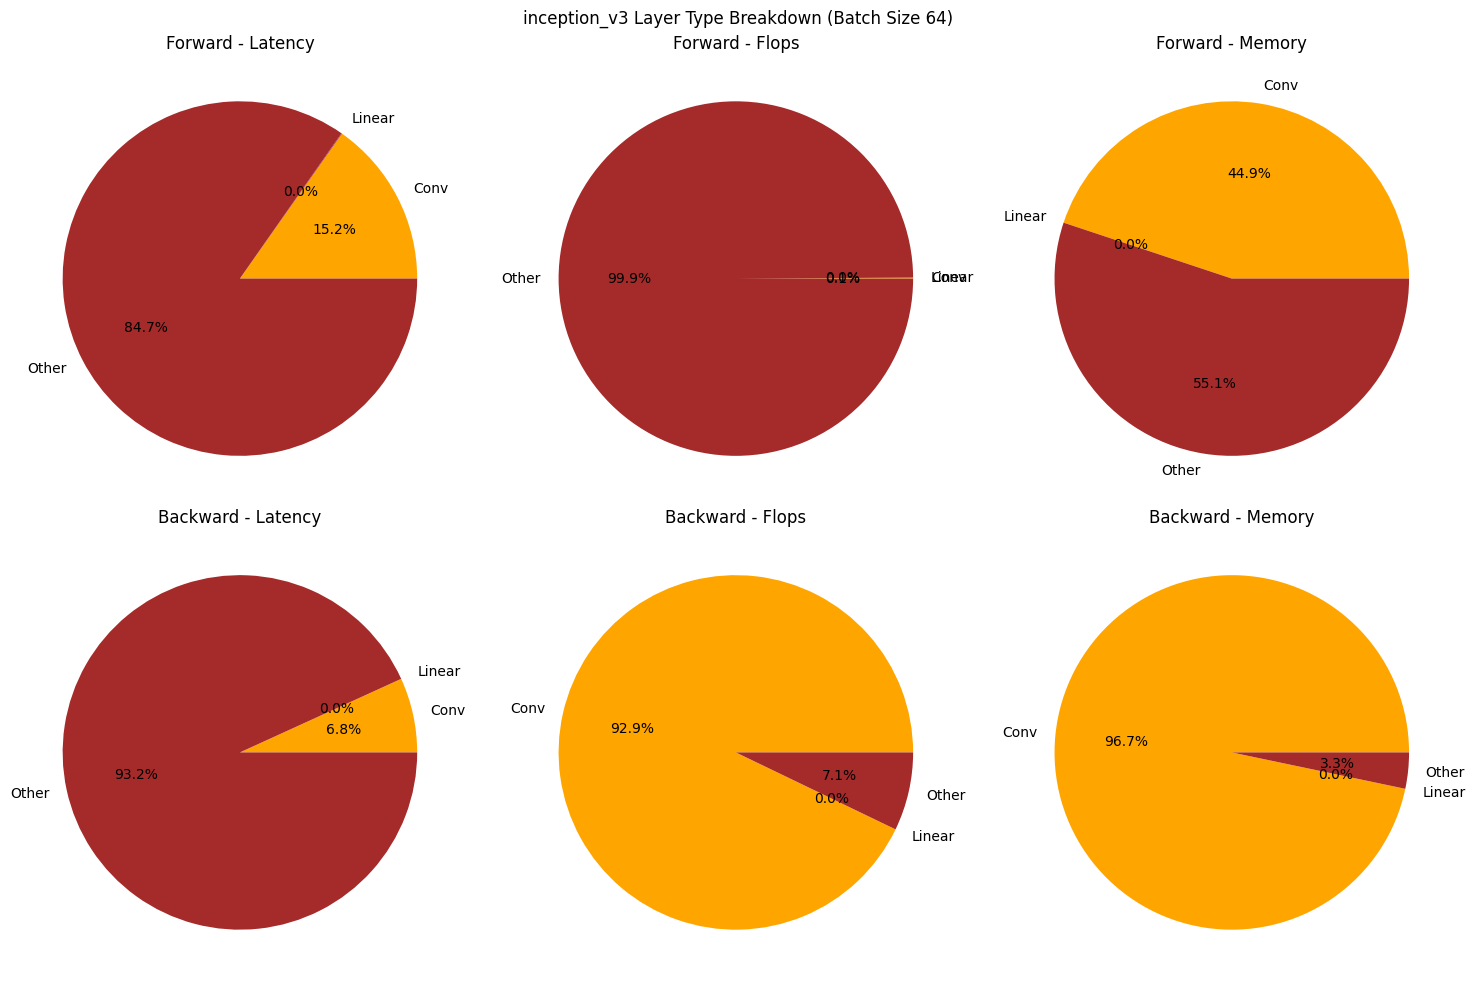


inception_v3 Totals:
  Forward FLOPs: 7924.92 GFLOPs, Memory: 2284.24 MB, Latency: 0.197s
  Backward FLOPs: 15849.83 GFLOPs, Memory: 2284.24 MB, Latency: 0.546s
Model: alexnet, Device: cuda:0
Input Size: (64, 3, 224, 224), Device: cuda:0
Layer (type (var_name):depth-idx)        Output Shape              Param #
AlexNet (AlexNet)                        [64, 1000]                --
├─Sequential (features): 1-1             [64, 256, 6, 6]           --
│    └─Conv2d (0): 2-1                   [64, 64, 55, 55]          23,296
│    └─ReLU (1): 2-2                     [64, 64, 55, 55]          --
│    └─MaxPool2d (2): 2-3                [64, 64, 27, 27]          --
│    └─Conv2d (3): 2-4                   [64, 192, 27, 27]         307,392
│    └─ReLU (4): 2-5                     [64, 192, 27, 27]         --
│    └─MaxPool2d (5): 2-6                [64, 192, 13, 13]         --
│    └─Conv2d (6): 2-7                   [64, 384, 13, 13]         663,936
│    └─ReLU (7): 2-8                     [

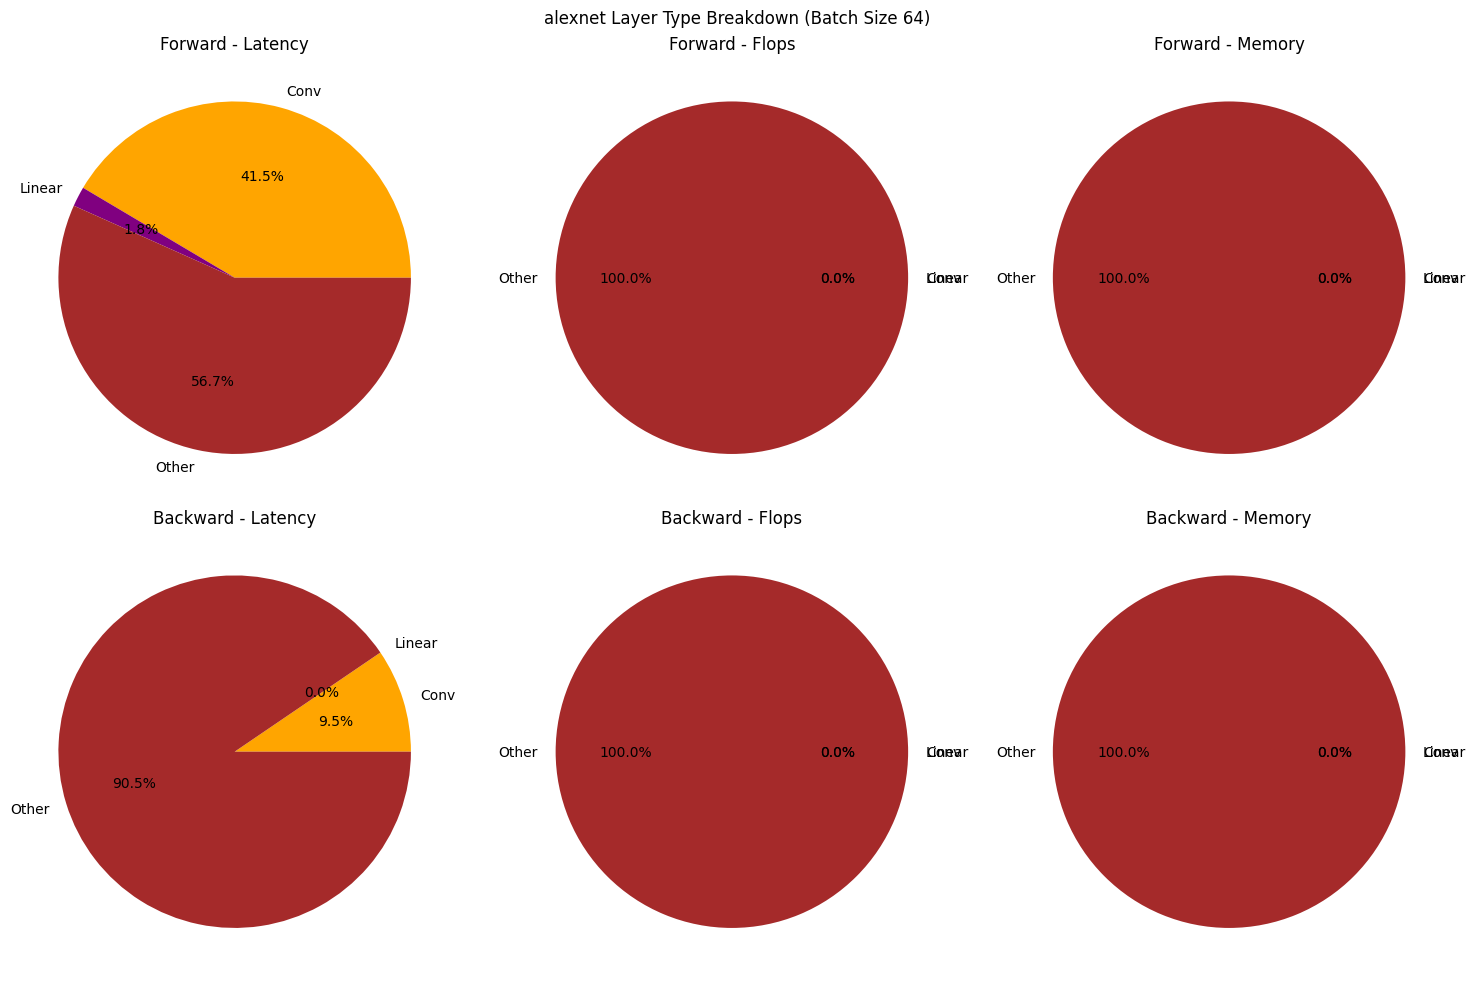


alexnet Totals:
  Forward FLOPs: 15446.03 GFLOPs, Memory: 768.28 MB, Latency: 0.012s
  Backward FLOPs: 30892.07 GFLOPs, Memory: 768.28 MB, Latency: 0.030s
Model: squeezenet1_0, Device: cuda:0
Input Size: (64, 3, 224, 224), Device: cuda:0
Layer (type (var_name):depth-idx)                  Output Shape              Param #
SqueezeNet (SqueezeNet)                            [64, 1000]                --
├─Sequential (features): 1-1                       [64, 512, 13, 13]         --
│    └─Conv2d (0): 2-1                             [64, 96, 109, 109]        14,208
│    └─ReLU (1): 2-2                               [64, 96, 109, 109]        --
│    └─MaxPool2d (2): 2-3                          [64, 96, 54, 54]          --
│    └─Fire (3): 2-4                               [64, 128, 54, 54]         --
│    │    └─Conv2d (squeeze): 3-1                  [64, 16, 54, 54]          1,552
│    │    └─ReLU (squeeze_activation): 3-2         [64, 16, 54, 54]          --
│    │    └─Conv2d (expand1x1

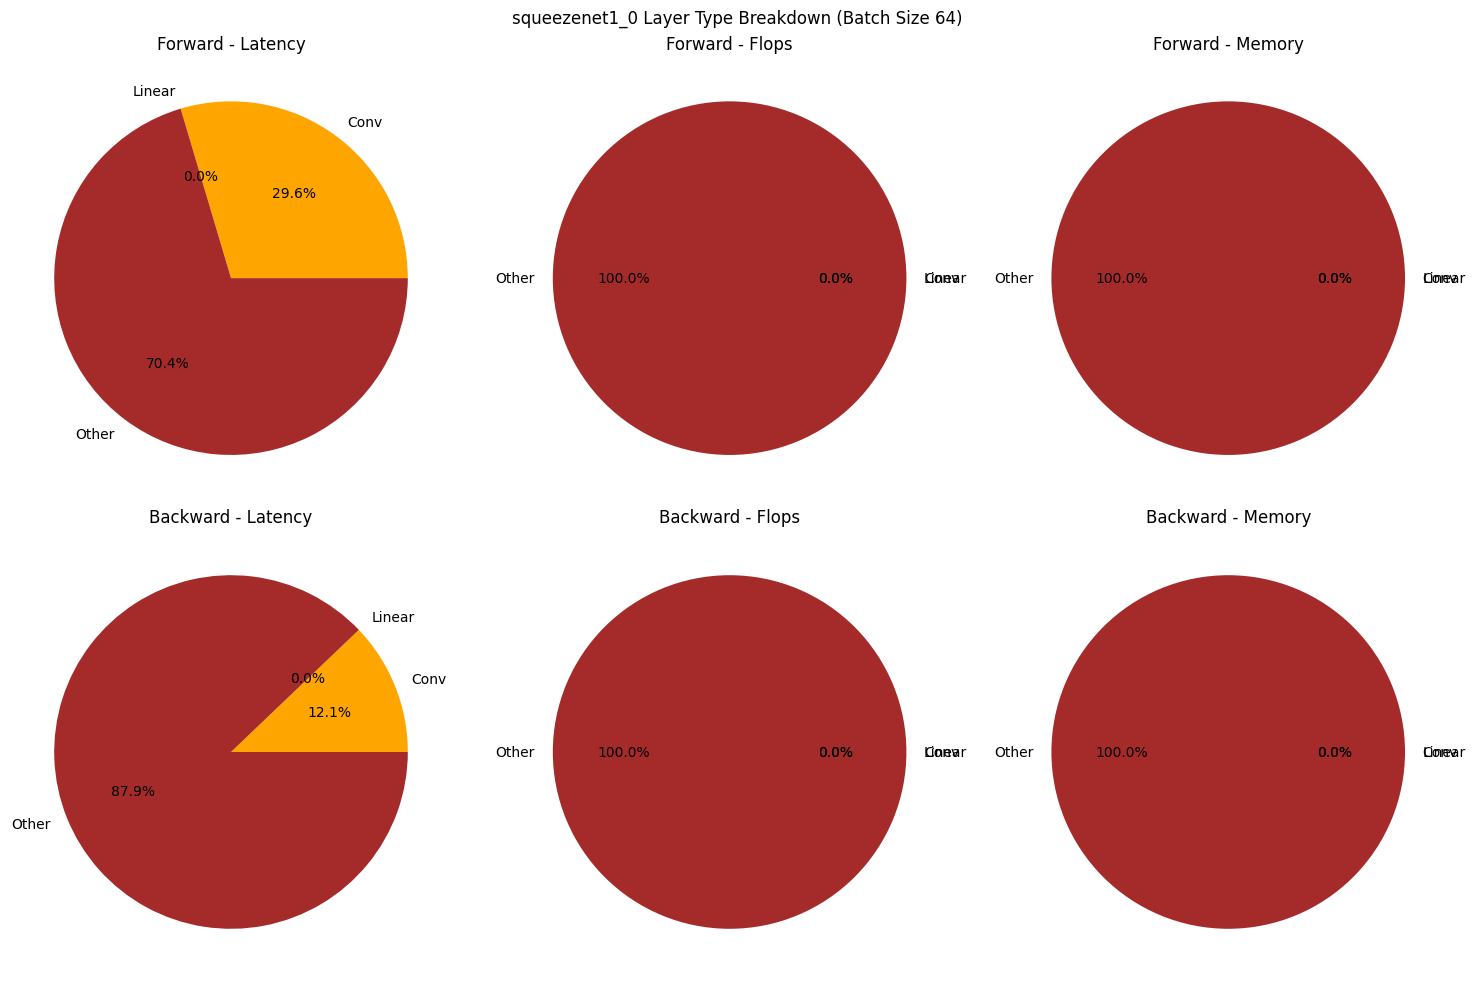


squeezenet1_0 Totals:
  Forward FLOPs: 328.25 GFLOPs, Memory: 822.54 MB, Latency: 0.049s
  Backward FLOPs: 656.50 GFLOPs, Memory: 822.54 MB, Latency: 0.107s
Model: shufflenet_v2_x1_0, Device: cuda:0
Input Size: (64, 3, 224, 224), Device: cuda:0
Layer (type (var_name):depth-idx)             Output Shape              Param #
ShuffleNetV2 (ShuffleNetV2)                   [64, 1000]                --
├─Sequential (conv1): 1-1                     [64, 24, 112, 112]        --
│    └─Conv2d (0): 2-1                        [64, 24, 112, 112]        648
│    └─BatchNorm2d (1): 2-2                   [64, 24, 112, 112]        48
│    └─ReLU (2): 2-3                          [64, 24, 112, 112]        --
├─MaxPool2d (maxpool): 1-2                    [64, 24, 56, 56]          --
├─Sequential (stage2): 1-3                    [64, 116, 28, 28]         --
│    └─InvertedResidual (0): 2-4              [64, 116, 28, 28]         --
│    │    └─Sequential (branch1): 3-1         [64, 58, 28, 28]          1

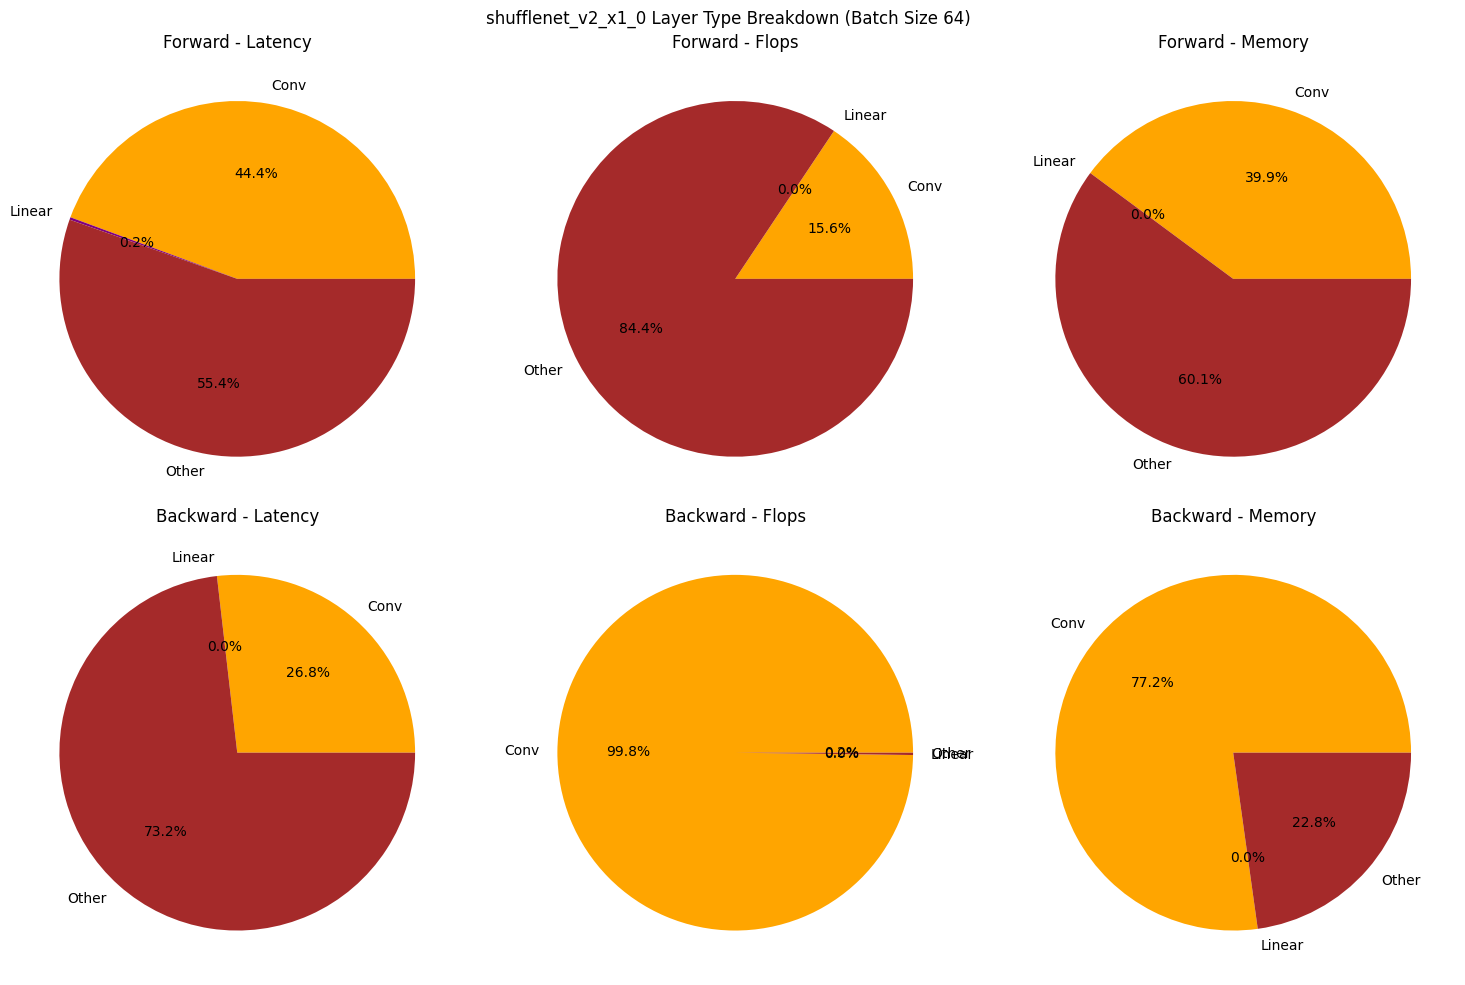


shufflenet_v2_x1_0 Totals:
  Forward FLOPs: 400.13 GFLOPs, Memory: 219.71 MB, Latency: 0.009s
  Backward FLOPs: 800.27 GFLOPs, Memory: 219.71 MB, Latency: 0.063s
Model: efficientnet_b0, Device: cuda:0
Input Size: (64, 3, 224, 224), Device: cuda:0
Layer (type (var_name):depth-idx)                                 Output Shape              Param #
EfficientNet (EfficientNet)                                       [64, 1000]                --
├─Sequential (features): 1-1                                      [64, 1280, 7, 7]          --
│    └─Conv2dNormActivation (0): 2-1                              [64, 32, 112, 112]        --
│    │    └─Conv2d (0): 3-1                                       [64, 32, 112, 112]        864
│    │    └─BatchNorm2d (1): 3-2                                  [64, 32, 112, 112]        64
│    │    └─SiLU (2): 3-3                                         [64, 32, 112, 112]        --
│    └─Sequential (1): 2-2                                        [64, 16, 112, 1

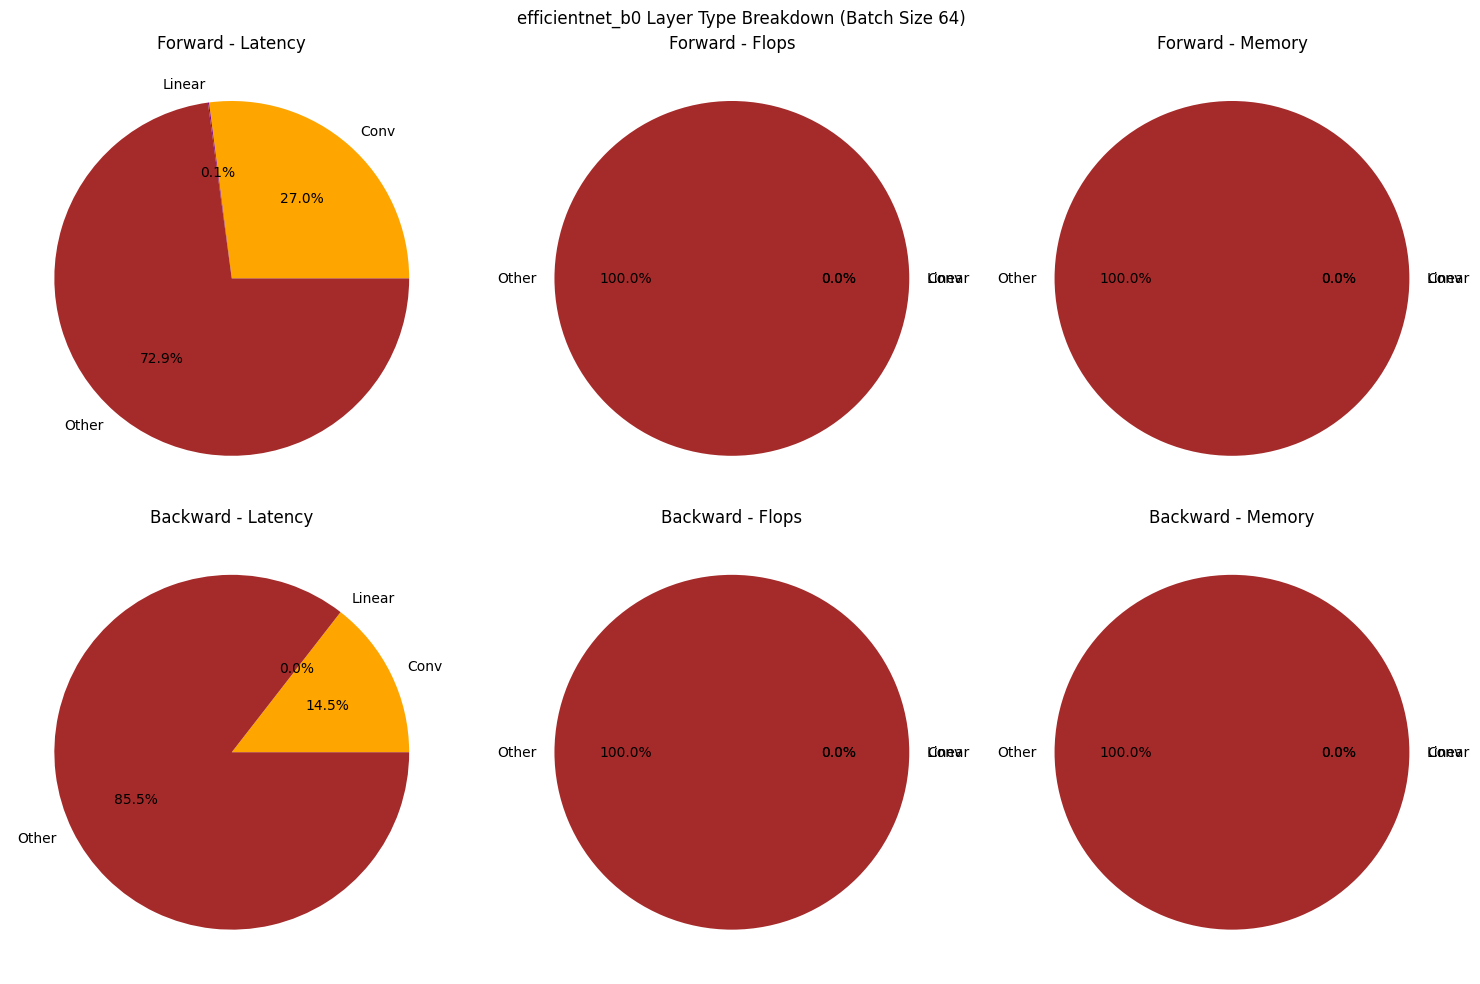


efficientnet_b0 Totals:
  Forward FLOPs: 1699.16 GFLOPs, Memory: 137.99 MB, Latency: 0.081s
  Backward FLOPs: 3398.32 GFLOPs, Memory: 137.99 MB, Latency: 0.249s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All plots saved in '/content/dnn_plots' and downloaded as 'dnn_plots.zip'


In [ ]:
# Markdown: # 5.2 Layer Breakdown Pie Charts

# Install torchinfo if not already installed
!pip install torchinfo

import torch
from torch.profiler import profile, ProfilerActivity
from torchinfo import summary
import matplotlib.pyplot as plt
import os
import shutil
from google.colab import files

# Define all models from Cell 2.1
subset = list(dnn_models.keys())
train_batch = 64  # Reasonable training batch size (started at 32)

# Create directory for saving plots
output_dir = "/content/dnn_plots"
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir, exist_ok=True)

# Checking for compatible versions
!pip show torchinfo
!pip show torch
# !pip uninstall torchinfo -y
# !pip install torchinfo
# !pip uninstall torch -y
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

for name in subset:
    # Ensure model is in evaluation mode
    model = dnn_models[name].eval().to("cuda" if torch.cuda.is_available() else "cpu")
    device = model.parameters().__next__().device
    input_size = (train_batch, 3, 299, 299) if name == "inception_v3" else (train_batch, 3, 224, 224)
    input_tensor = torch.randn(input_size, device=device, requires_grad=True)

    print(f"Model: {name}, Device: {device}")
    print(f"Input Size: {input_size}, Device: {input_tensor.device}")

    # Forward pass profiling and analysis
    with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], record_shapes=True) as prof:
        output = model(input_tensor)
    forward_data = prof.key_averages(group_by_input_shape=True)

    # Backward pass profiling and analysis
    with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], record_shapes=True) as prof:
        output.sum().backward()
    backward_data = prof.key_averages(group_by_input_shape=True)

    # Use torchinfo for per-layer FLOPs and memory with debugging
    try:
        stats = summary(model, input_size=input_size, verbose=1, device=device, row_settings=["depth", "var_names"])
    except Exception as e:
        print(f"Error with {name} summary: {e}")
        continue

    # Initialize per-layer metrics
    forward_flops = {}
    forward_memory = {}
    forward_latency = {}
    backward_flops = {}
    backward_memory = {}
    backward_latency = {}

    # Extract per-layer FLOPs and memory from torchinfo
    for layer in stats.summary_list:
        layer_name = layer.var_name
        # Check if MACs exist, handle potential None or zero
        macs = layer.macs if layer.macs is not None else 0
        if macs == 0:
            print(f"Warning: Layer {layer_name} has 0 MACs. Check model or input.")
            if "conv" in layer_name.lower():
                print(f"Attempting manual estimation for convolutional layer {layer_name}...")
                # Manual estimation for Conv2d layers
                if isinstance(layer.module, torch.nn.Conv2d):
                    conv = layer.module
                    in_channels, out_channels = conv.in_channels, conv.out_channels
                    kernel_size = conv.kernel_size[0]  # Assume square kernel
                    stride = conv.stride[0]  # Assume square stride
                    padding = conv.padding[0]  # Assume symmetric padding
                    batch, _, height, width = input_size
                    out_height = (height - kernel_size + 2 * padding) // stride + 1
                    out_width = (width - kernel_size + 2 * padding) // stride + 1
                    macs = in_channels * out_channels * kernel_size * kernel_size * out_height * out_width * batch
                elif "avgpool" in layer_name.lower() or "maxpool" in layer_name.lower():
                    # Pooling layers have 0 MACs, no estimation needed
                    macs = 0
        forward_flops[layer_name] = (macs * 2) / 1e9  # GFLOPs
        forward_memory[layer_name] = (layer.output_bytes + layer.param_bytes) / (1024**2)  # MB

    # Extract per-layer latency from profiler (forward)
    for event in forward_data:
        layer_name = event.key
        cpu_time = event.cpu_time_total / 1e6  # seconds
        cuda_time = event.cuda_time_total / 1e6 if hasattr(event, 'cuda_time_total') and torch.cuda.is_available() else 0  # seconds
        forward_latency[layer_name] = cpu_time + cuda_time

    # Extract per-layer latency from profiler (backward)
    for event in backward_data:
        layer_name = event.key
        cpu_time = event.cpu_time_total / 1e6  # seconds
        cuda_time = event.cuda_time_total / 1e6 if hasattr(event, 'cuda_time_total') and torch.cuda.is_available() else 0  # seconds
        backward_latency[layer_name] = cpu_time + cuda_time

    # Approximate backward FLOPs (2x forward) and memory (same as forward)
    for layer_name in forward_flops:
        backward_flops[layer_name] = forward_flops[layer_name] * 2
        backward_memory[layer_name] = forward_memory[layer_name]

    # Aggregate by layer type (Conv, Linear, Other) for simplicity instead of naming each layer sepretaly
    layer_types = ["Conv", "Linear", "Other"]
    forward_breakdown = {"latency": {}, "flops": {}, "memory": {}}
    backward_breakdown = {"latency": {}, "flops": {}, "memory": {}}

    for pass_data, breakdown in [(forward_data, forward_breakdown), (backward_data, backward_breakdown)]:
        for event in pass_data:
            key = "Conv" if "conv" in event.key.lower() else "Linear" if "linear" in event.key.lower() else "Other"
            breakdown["latency"][key] = breakdown["latency"].get(key, 0) + (event.cpu_time_total / 1e6 +
                                                                          (event.cuda_time_total / 1e6 if hasattr(event, 'cuda_time_total') and torch.cuda.is_available() else 0))
        # Use torchinfo data for FLOPs and memory, not profiler
        for layer_name in forward_flops:
            key = "Conv" if "conv" in layer_name.lower() else "Linear" if "linear" in layer_name.lower() else "Other"
            breakdown["flops"][key] = breakdown["flops"].get(key, 0) + forward_flops[layer_name] if pass_data == forward_data else backward_flops[layer_name]
            breakdown["memory"][key] = breakdown["memory"].get(key, 0) + forward_memory[layer_name] if pass_data == forward_data else backward_memory[layer_name]

    # Plot type-level pie charts for latency, FLOPs, and memory (forward and backward, no thresholds)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for i, (pass_name, breakdown) in enumerate([("Forward", forward_breakdown), ("Backward", backward_breakdown)]):
        for j, metric in enumerate(["latency", "flops", "memory"]):
            values = [breakdown[metric].get(t, 0) for t in layer_types]
            if sum(values) == 0:
                axes[i, j].text(0.5, 0.5, "No Data", ha='center', va='center')
            else:
                axes[i, j].pie(values, labels=layer_types, autopct='%1.1f%%', colors=['orange', 'purple', 'brown'])
            axes[i, j].set_title(f"{pass_name} - {metric.capitalize()}")
    plt.suptitle(f"{name} Layer Type Breakdown (Batch Size 64)")
    plt.tight_layout()
    plt.show()  # Display in Colab
    plt.savefig(os.path.join(output_dir, f"{name}_breakdowns.png"), bbox_inches="tight")  # Save for LaTeX
    plt.close()

    # Optional: Print totals for verification
    print(f"\n{name} Totals:")
    print(f"  Forward FLOPs: {sum(forward_flops.values()):.2f} GFLOPs, Memory: {sum(forward_memory.values()):.2f} MB, Latency: {sum(forward_latency.values()):.3f}s")
    print(f"  Backward FLOPs: {sum(backward_flops.values()):.2f} GFLOPs, Memory: {sum(backward_memory.values()):.2f} MB, Latency: {sum(backward_latency.values()):.3f}s")

# Zip and download plots
zip_path = "/content/dnn_plots.zip"
shutil.make_archive("/content/dnn_plots", 'zip', output_dir)
files.download(zip_path)

print(f"All plots saved in '{output_dir}' and downloaded as 'dnn_plots.zip'")

In [ ]:
!pip install torch torchvision thop pandas seaborn matplotlib

In [ ]:
!pip install torchstat thop

In [ ]:
import torch
import torchvision.models as models
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from thop import profile
import time
from scipy.stats import spearmanr
from torch.autograd import Variable
from torchsummary import summary
import warnings

In [ ]:
!nvidia-smi

Mon Feb 24 02:57:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P0             30W /   70W |   11608MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.156
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.00GHz
    CPU family:           6
    Model:                85
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             3
    BogoMIPS:             4000.31
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [ ]:

# Ensure Git config (already set in your commands)
!git config --global user.email "sa2436@cornell.edu"
!git config --global user.name "ginoitaliano"

# Add and commit files (if not already done)
!cd dnn_project && git add .
!cd dnn_project && git commit -m "Executable for A1"

# Push to GitHub (use PAT if authentication fails)
!cd dnn_project && git push -u origin main

/bin/bash: line 1: cd: dnn_project: No such file or directory
/bin/bash: line 1: cd: dnn_project: No such file or directory
/bin/bash: line 1: cd: dnn_project: No such file or directory
